In [1]:
#import stumpy
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Grouper
from pandas import DataFrame
import csv
import pickle
import math
import matrixprofile as mp
from matplotlib.patches import Rectangle
from fbprophet import Prophet
from prophet.plot import plot_yearly
from sklearn.metrics import mean_squared_error
import copy

In [2]:
def df_origen(origen,destino):    
    
    ######################PICKLE 1###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento1.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df1 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df1.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df1_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento1.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 2###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento2.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df2 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df2.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)           
    
    df2_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento2.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)   
    
    ######################PICKLE 3###############################
    with open('/home/jonathan/tesis/3er_avance/columns_names_confinamiento3.pickle', "rb") as file:   
        columns_names = pickle.load(file)

    names = list(columns_names)
    lista=["ds"]

    for trayectos in names:    
        x=trayectos.startswith(origen)    
        if x==True:                         
            lista.append(trayectos)
    
    df3 = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=lista)
    
    #Filtramos el destino
    columns_names_df = df3.columns   
    names_1 = list(columns_names_df)     
    
    listaDst=["ds"]
    for trayectos in names_1:            
        x=trayectos.split("-",1)[1]        
        if x==destino:                         
            listaDst.append(trayectos)            
    
    df3_Final = pd.read_csv("/home/jonathan/tesis/3er_avance/Trayectos_Periodo_Confinamiento3.csv", sep=',',index_col=0, parse_dates=True, usecols=listaDst)
    
    
    
    df1_Final['Fecha'] = df1_Final.index.date
    df1_Final['Año'] = df1_Final.index.year                                
    df1_Final['Mes'] = df1_Final.index.month                               
    df1_Final['ID_Dia'] = df1_Final.index.dayofweek
    df1_Final['Hora'] = df1_Final.index.hour
    df1_Final['WeekNo'] = df1_Final.index.isocalendar().week
    
    df2_Final['Fecha'] = df2_Final.index.date
    df2_Final['Año'] = df2_Final.index.year                                
    df2_Final['Mes'] = df2_Final.index.month                               
    df2_Final['ID_Dia'] = df2_Final.index.dayofweek
    df2_Final['Hora'] = df2_Final.index.hour
    df2_Final['WeekNo'] = df2_Final.index.isocalendar().week
    
    df3_Final['Fecha'] = df3_Final.index.date
    df3_Final['Año'] = df3_Final.index.year                                
    df3_Final['Mes'] = df3_Final.index.month                               
    df3_Final['ID_Dia'] = df3_Final.index.dayofweek
    df3_Final['Hora'] = df3_Final.index.hour
    df3_Final['WeekNo'] = df3_Final.index.isocalendar().week
    
    return df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst

In [3]:
origen = "2807905"
destino = "2807901"
df1, lista, df2, df3, df1_Final,df2_Final,df3_Final, listaDst = df_origen(origen,destino)
df1_Final.head(5)
df2_Final.head(5)
df3_Final.head(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-08-01 00:00:00,342.675,2020-08-01,2020,8,5,0,31
2020-08-01 01:00:00,161.815,2020-08-01,2020,8,5,1,31
2020-08-01 02:00:00,69.203,2020-08-01,2020,8,5,2,31
2020-08-01 03:00:00,44.679,2020-08-01,2020,8,5,3,31
2020-08-01 04:00:00,27.632,2020-08-01,2020,8,5,4,31


In [4]:
#Creamos intervalos de datos por periodos
data1=df1_Final.loc['2020-03-16':'2020-04-15']
data2=df1_Final.loc['2020-04-16':'2020-05-15']
data3=df1_Final.loc['2020-05-02':'2020-05-31']
data4=df2_Final.loc['2020-06-01':'2020-06-30']
data5=df2_Final.loc['2020-07-01':'2020-07-31']
data6=df3_Final.loc['2020-08-01':'2020-08-31']
data3.head(5)

,2807905-2807901,Fecha,Año,Mes,ID_Dia,Hora,WeekNo
ds,,,,,,,
2020-05-02 00:00:00,6.944,2020-05-02,2020,5,5,0,18
2020-05-02 01:00:00,17.860,2020-05-02,2020,5,5,1,18
2020-05-02 02:00:00,11.972,2020-05-02,2020,5,5,2,18
2020-05-02 03:00:00,12.205,2020-05-02,2020,5,5,3,18
2020-05-02 04:00:00,5.986,2020-05-02,2020,5,5,4,18


# Periodo 1 - Desescalada y Nueva Normalidad (2 mayo 2020-31 Agosto 2020)

In [5]:
Periodo1 = pd.concat([data3,data4,data5,data6])
Periodo1 = Periodo1.drop(columns=['Fecha','Año','Mes','ID_Dia','Hora','WeekNo'])
Periodo1 = Periodo1.reset_index()
Periodo1 = Periodo1.rename(columns={'2807905-2807901':'y'})
Periodo1 = Periodo1.set_index(["ds"])
Periodo1.tail()

,y
ds,
2020-08-31 19:00:00,509.100
2020-08-31 20:00:00,293.615
2020-08-31 21:00:00,256.641
2020-08-31 22:00:00,172.866
2020-08-31 23:00:00,140.111


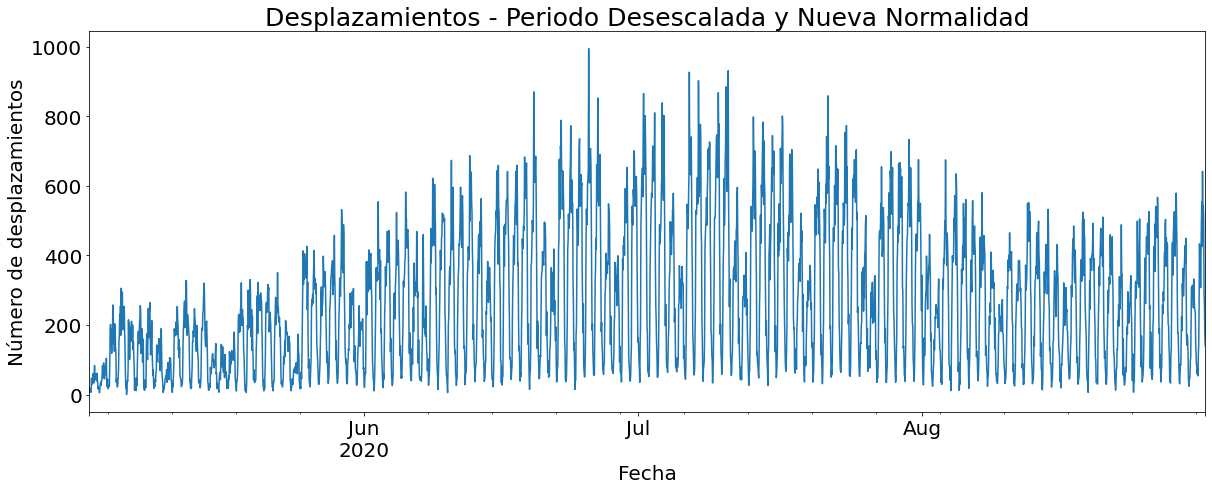

In [6]:
Periodo1['y'].plot(figsize=(20,7), legend=None, fontsize=20)
plt.title('Desplazamientos - Periodo Desescalada y Nueva Normalidad', fontsize=25)
plt.xlabel('Fecha',fontsize=20)
plt.ylabel('Número de desplazamientos',fontsize=20)
plt.show()

In [7]:
Periodo1 = Periodo1.reset_index()

# PROPHET
## Definimos datos de entrenamiento y datos de prueba

In [8]:
X = Periodo1.y
Y = Periodo1.ds
size = int(len(X) * 0.90)
train_X, test_X = X[0:size], X[size:len(X)]
train_Y, test_Y = Y[0:size], Y[size:len(Y)]
    
Train = pd.concat([train_Y,train_X], axis=1)
Test = pd.concat([test_Y,test_X], axis=1)

In [9]:
Test.head(50)

,ds,y
2635,2020-08-19 19:00:00,391.765
2636,2020-08-19 20:00:00,303.351
2637,2020-08-19 21:00:00,234.325
2638,2020-08-19 22:00:00,193.813
2639,2020-08-19 23:00:00,106.866
2640,2020-08-20 00:00:00,98.351
2641,2020-08-20 01:00:00,35.206
2642,2020-08-20 02:00:00,34.291
2643,2020-08-20 03:00:00,42.368
2644,2020-08-20 04:00:00,30.192


In [10]:
def est_Lunes(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 0)
def est_Martes(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 1)
def est_Miercoles(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 2)
def est_Jueves(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 3)
def est_Viernes(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 4)
def est_Sabado(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 5)
def est_Domingo(ds):
    date = pd.to_datetime(ds)
    return (date.dayofweek == 6)

Train['Lunes'] = Train['ds'].apply(est_Lunes)
Train['Martes'] = Train['ds'].apply(est_Martes)
Train['Miercoles'] = Train['ds'].apply(est_Miercoles)
Train['Jueves'] = Train['ds'].apply(est_Jueves)
Train['Viernes'] = Train['ds'].apply(est_Viernes)
Train['Sabado'] = Train['ds'].apply(est_Sabado)
Train['Domingo'] = Train['ds'].apply(est_Domingo)

Test['Lunes'] = Test['ds'].apply(est_Lunes)
Test['Martes'] = Test['ds'].apply(est_Martes)
Test['Miercoles'] = Test['ds'].apply(est_Miercoles)
Test['Jueves'] = Test['ds'].apply(est_Jueves)
Test['Viernes'] = Test['ds'].apply(est_Viernes)
Test['Sabado'] = Test['ds'].apply(est_Sabado)
Test['Domingo'] = Test['ds'].apply(est_Domingo)

In [11]:
Train.iloc[:,:]
#date = pd.to_datetime('2022-09-05')
#print(date.dayofweek)

,ds,y,Lunes,Martes,Miercoles,Jueves,Viernes,Sabado,Domingo
0,2020-05-02 00:00:00,6.944,False,False,False,False,False,True,False
1,2020-05-02 01:00:00,17.860,False,False,False,False,False,True,False
2,2020-05-02 02:00:00,11.972,False,False,False,False,False,True,False
3,2020-05-02 03:00:00,12.205,False,False,False,False,False,True,False
4,2020-05-02 04:00:00,5.986,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
2630,2020-08-19 14:00:00,402.202,False,False,True,False,False,False,False
2631,2020-08-19 15:00:00,405.006,False,False,True,False,False,False,False
2632,2020-08-19 16:00:00,447.718,False,False,True,False,False,False,False
2633,2020-08-19 17:00:00,492.218,False,False,True,False,False,False,False


## Hacemos ciclo for para predecir el día siguiente uno tras otro
## La predicción se demora 50 minutos

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -62.6806
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5497.27    0.00714149       580.771           1           1      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     189       5501.73   0.000295439       151.599   3.674e-06       0.001      258  LS failed, Hessian reset 
     199       5501.76   6.60504e-05       70.6869           1           1      271   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     240       5501.97   0.000132992       99.6273    9.15e-07       0.001      357  LS failed, Hessian reset 
     299       5502.08     0.0020565       66.8218           1           1      436   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5503.31    0.00387258       85.9093           1           1      557   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=448.326481, expected=391.765000
Initial log joint probability = -60.3204
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5500.82    0.00533861       130.672      0.3612      0.3612      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5504.27   0.000604614       99.6329           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5505.04    0.00171043       66.8675           1           1      365   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5505.21   0.000159658       38.3658      0.6741           1      488   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       5505.24   5.06978e-05       68.7514      0.9877      0.9877      621   
    Iter      log prob

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=379.509924, expected=303.351000
Initial log joint probability = -68.4525
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5502.55   0.000671586       74.8767      0.7595      0.7595      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5506.41   1.47108e-05       96.8043      0.2258      0.2258      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     243       5507.11    0.00021899       155.818   2.058e-06       0.001      340  LS failed, Hessian reset 
     299       5507.45   1.55139e-05       40.2759     0.03847           1      411   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     320       5507.49   0.000304227        198.84   4.209e-06       0.001      471  LS failed, Hessian reset 
     383       5507.53   1.82489e-05       51.4675   2.596e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=261.753158, expected=234.325000
Initial log joint probability = -79.6374
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5505.38    0.00793181       251.508      0.6272           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5508.9    6.9612e-05       61.4053           1           1      262   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5509.44   0.000666008        88.069           1           1      379   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     320       5509.77   0.000219066       173.677   1.319e-06       0.001      443  LS failed, Hessian reset 
     360       5510.03   3.15149e-06       56.5456   7.848e-08       0.001      535  LS failed, Hessian reset 
     399       5510.05   2.39705e-05        52.548      0.1386    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=151.724790, expected=193.813000
Initial log joint probability = -88.1804
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5507.8    0.00124394       120.626           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5511.12   0.000711092        166.21      0.7459      0.7459      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     240       5511.32   0.000530761       62.6618   6.855e-06       0.001      338  LS failed, Hessian reset 
     299       5511.45   9.96949e-05       67.6948           1           1      420   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     321       5511.82   0.000104192       73.2527   7.776e-07       0.001      482  LS failed, Hessian reset 
     397       5511.97   7.23071e-05       70.5651   1.043e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=87.273287, expected=106.866000
Initial log joint probability = -111.417
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5510.61    0.00037732       215.395       0.628       0.628      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141       5512.67   0.000126604       87.3946   8.108e-07       0.001      220  LS failed, Hessian reset 
     199        5513.7     0.0010621       130.379           1           1      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     262       5514.29   9.95324e-05        76.687   9.115e-07       0.001      419  LS failed, Hessian reset 
     299       5514.81   0.000332715       45.1896      0.6309      0.6309      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     361       5514.88   0.000189545       83.5939   2.841e-06     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=59.184388, expected=98.351000
Initial log joint probability = -114.063
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      90       5513.45   0.000215996        155.46   1.865e-06       0.001      149  LS failed, Hessian reset 
      99       5513.85   0.000733366       82.8393      0.4327           1      160   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5516.31   6.09612e-05       66.7769      0.6697      0.6697      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     239       5516.88   0.000378444        209.35   3.925e-06       0.001      378  LS failed, Hessian reset 
     299       5517.26   0.000173443       73.5464        0.25      0.7439      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     301       5517.26   4.43794e-05       82.9549   5.746e-07      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=27.507807, expected=35.206000
Initial log joint probability = -135.618
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5515.23    0.00219322       97.2804           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     149       5517.36   0.000223318         169.4   1.014e-06       0.001      227  LS failed, Hessian reset 
     199       5518.24    0.00123625       89.1824      0.7223      0.7223      287   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208        5518.4   0.000392929       203.663   5.106e-06       0.001      336  LS failed, Hessian reset 
     269        5518.8   2.66017e-05       58.0612   5.184e-07       0.001      449  LS failed, Hessian reset 
     299       5518.81   0.000158134       53.4769           1           1      486   
    Iter      log prob        ||dx||      ||grad|

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=-5.240504, expected=34.291000
Initial log joint probability = -135.96
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5518.62   0.000808692       261.848      0.2859      0.2859      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     178       5520.75   0.000149418       114.069   9.494e-07       0.001      270  LS failed, Hessian reset 
     199       5521.05   8.29046e-05       60.9579      0.3649           1      296   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     223       5521.15   0.000138824       103.601   1.706e-06       0.001      368  LS failed, Hessian reset 
     290        5521.8    0.00178269       133.638   2.926e-05       0.001      489  LS failed, Hessian reset 
     299       5521.97   0.000321047       88.4686      0.9919      0.9919      501   
    Iter      log prob        ||dx||      ||grad||

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=-23.117096, expected=42.368000
Initial log joint probability = -133.006
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5519.73    0.00474224       211.845           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     116       5520.61   0.000136167       101.703   8.865e-07       0.001      181  LS failed, Hessian reset 
     199       5523.27   0.000487511       39.5906      0.2332           1      289   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     213       5523.47   0.000688272       218.598     8.4e-06       0.001      351  LS failed, Hessian reset 
     286       5524.22   0.000238859       121.952   6.797e-07       0.001      482  LS failed, Hessian reset 
     299       5524.62    0.00121455       61.4607      0.3771           1      499   
    Iter      log prob        ||dx||      ||grad

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=-11.994341, expected=30.192000
Initial log joint probability = -137.49
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5521.6    0.00151138       258.817      0.1727      0.1727      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     149       5524.35   0.000233314       140.459    7.27e-07       0.001      227  LS failed, Hessian reset 
     199       5525.45    0.00071902       74.3413      0.3838      0.3838      293   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     217       5525.73   0.000356611       155.934   6.651e-06       0.001      354  LS failed, Hessian reset 
     251       5525.88   1.99714e-05       48.4984   3.028e-07       0.001      438  LS failed, Hessian reset 
     268       5525.88   1.01043e-06       70.4997   1.833e-08       0.001      497  LS failed, Hessian reset 
     270       5525.88   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=31.883624, expected=30.377000
Initial log joint probability = -137.424
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5524.82    0.00498879       103.667       2.273      0.2273      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     196        5528.3   0.000158586        129.99   1.729e-06       0.001      283  LS failed, Hessian reset 
     199       5528.38   0.000661695        80.139           1           1      287   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     283       5529.12   0.000146411        96.581    7.59e-07       0.001      446  LS failed, Hessian reset 
     299       5529.43   0.000364129       39.4688           1           1      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     386        5529.7   0.000193873       133.193   2.508e-06      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=115.302553, expected=168.007000
Initial log joint probability = -94.544
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5527.32    0.00564335       125.992      0.4706      0.4706      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     129       5528.94   0.000436297       195.452   4.746e-06       0.001      198  LS failed, Hessian reset 
     199       5530.72   0.000533738       74.2208      0.3961      0.3961      283   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     280       5531.45   0.000149375       113.872   9.649e-07       0.001      421  LS failed, Hessian reset 
     299       5531.58   1.99453e-05       52.4846      0.3646           1      444   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5531.88   0.000693796       71.8222       2.282     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=218.363233, expected=219.592000
Initial log joint probability = -82.8367
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5529.21    0.00225724       262.619       0.118      0.3674      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5533.33    3.1229e-05       99.3257    0.004791      0.5317      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     234       5533.77   0.000559816       256.333   6.176e-06       0.001      331  LS failed, Hessian reset 
     276       5534.02   0.000273421       77.1929   3.914e-06       0.001      420  LS failed, Hessian reset 
     299       5534.05   2.56662e-06       53.0693       0.249       0.249      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     371        5534.5   8.39074e-05       66.2574   1.104e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=299.184297, expected=277.609000
Initial log joint probability = -72.5036
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5531.51    0.00858239       157.263      0.3849           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5536.13   0.000168927       125.328      0.5801      0.5801      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5537.09   0.000117214       51.0935      0.4334      0.4334      374   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     312        5537.1   1.34972e-05       62.8712   2.854e-07       0.001      434  LS failed, Hessian reset 
     344       5537.11   1.44982e-05       54.3541   2.185e-07       0.001      519  LS failed, Hessian reset 
     382       5537.11   5.25001e-07       44.0815   7.539e-09    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=327.503412, expected=368.209000
Initial log joint probability = -62.3585
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5534.01    0.00345133       146.251           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     163       5537.79   0.000130889       113.139   9.632e-07       0.001      247  LS failed, Hessian reset 
     199       5538.29   0.000257606       68.4564      0.4903      0.4903      291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     242       5538.68    0.00123724       325.298   1.402e-05       0.001      373  LS failed, Hessian reset 
     299       5539.02   6.64229e-05       60.3864      0.5037      0.5037      438   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5539.06   0.000251157         67.97      0.9811    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=322.059381, expected=313.153000
Initial log joint probability = -67.6757
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5537.18    0.00596407       217.749      0.7321      0.7321      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5541.11   0.000882575       107.023           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     291       5541.94    0.00020808       102.131   3.634e-06       0.001      403  LS failed, Hessian reset 
     299       5541.98    0.00011578       45.4197       1.042      0.1042      414   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     356       5542.04   1.41281e-05       72.6087   2.766e-07       0.001      533  LS failed, Hessian reset 
     399       5542.04   1.71944e-05       54.9108           1    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=333.182790, expected=390.574000
Initial log joint probability = -60.9954
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5538.6    0.00106366       151.513           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5542.94    0.00129749       111.178           1           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208        5543.2   0.000174932       138.848   1.311e-06       0.001      287  LS failed, Hessian reset 
     299       5543.85    0.00212522       100.656      0.4206           1      394   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     321       5544.19   0.000133469       71.5765   7.144e-07       0.001      460  LS failed, Hessian reset 
     378       5544.34   9.98716e-05       76.3974   1.159e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=393.451239, expected=426.591000
Initial log joint probability = -59.7085
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5540.58    0.00730632       179.974           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5545.35    0.00160261       127.574      0.9437      0.9437      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     236       5545.68   0.000113333       99.6902   1.553e-06       0.001      336  LS failed, Hessian reset 
     299       5545.91    0.00209427       178.675      0.4408      0.4408      412   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     314       5546.18   0.000330517       170.889   3.909e-06       0.001      476  LS failed, Hessian reset 
     344       5546.27    8.0078e-05        63.327   9.227e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=462.805411, expected=478.170000
Initial log joint probability = -59.8688
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5542.13     0.0112234       136.192           1           1      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5547.87   0.000333073       52.2771      0.7578      0.7578      228   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215       5548.01   7.70015e-05       59.1648     1.2e-06       0.001      292  LS failed, Hessian reset 
     262       5548.37   0.000134953       102.998   1.156e-06       0.001      386  LS failed, Hessian reset 
     299       5548.61   0.000855539       74.3885      0.8156      0.8156      428   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     322       5548.69   0.000119191       101.478   1.045e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=478.497820, expected=398.903000
Initial log joint probability = -60.6174
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5546.2    0.00174649        403.58      0.5801      0.5801      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     151       5549.29   0.000103165       80.4601    1.01e-06       0.001      237  LS failed, Hessian reset 
     199       5549.92   4.93103e-05       79.6171      0.1514      0.1514      300   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     263       5550.71   0.000212178       160.781   1.551e-06       0.001      426  LS failed, Hessian reset 
     299       5550.84    1.8348e-05       71.3896           1           1      476   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     394       5551.33   0.000106809       89.9841   1.484e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=431.837512, expected=425.530000
Initial log joint probability = -59.7418
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5547.64   0.000419648       134.723      0.5015      0.5015      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5552.67    0.00094372       77.9201      0.7174      0.7174      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211       5553.05   0.000171781       126.866   8.834e-07       0.001      294  LS failed, Hessian reset 
     246       5553.38   8.31786e-06        55.457   1.237e-07       0.001      377  LS failed, Hessian reset 
     264       5553.38   1.78639e-07       56.6309      0.2184           1      406   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=389.543639, expected=401.151000
Initial log joint probability = -60.5318
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5550.39     0.0035032       179.772           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     187       5555.31   0.000155107        122.12   1.021e-06       0.001      268  LS failed, Hessian reset 
     199       5555.44   0.000101283       44.0129      0.8849      0.8849      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5556.32   0.000939159        101.55      0.7754      0.7754      414   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     310       5556.43   0.000111163       94.3662    9.88e-07       0.001      479  LS failed, Hessian reset 
     399       5556.51   2.38621e-05       56.8493      0.6186    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=406.892212, expected=422.598000
Initial log joint probability = -59.8156
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5553.29     0.0104719       571.463           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5557.66   0.000577562       109.316           1           1      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     227       5558.01    0.00057073       255.455   6.196e-06       0.001      329  LS failed, Hessian reset 
     263       5558.22   7.39224e-06       59.7855   1.274e-07       0.001      414  LS failed, Hessian reset 
     299       5558.24   0.000292574       60.0387      0.9326      0.9326      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     360       5558.96   0.000671461       116.159   5.985e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=461.181324, expected=368.820000
Initial log joint probability = -62.4165
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5554.85    0.00785891        138.38           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5559.39    0.00472018       161.692           1           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       5559.99   0.000115357       72.2536   1.392e-06       0.001      320  LS failed, Hessian reset 
     299       5560.31    0.00051507       96.8369           1           1      411   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     331        5560.8   0.000487577       123.683   6.662e-06       0.001      484  LS failed, Hessian reset 
     399       5560.89   1.16476e-06       54.8299      0.8141    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=472.937932, expected=510.106000
Initial log joint probability = -61.126
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5557.97    0.00931493       172.536           1           1      108   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     180       5561.73   0.000119392       96.9909   1.638e-06       0.001      244  LS failed, Hessian reset 
     199       5561.79    2.9424e-05       63.7681      0.6295      0.6295      270   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229       5562.16    0.00101033       118.899   1.116e-05       0.001      338  LS failed, Hessian reset 
     299       5562.54    0.00360222       76.9306           1           1      424   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     303       5562.56    0.00047381        110.57   7.408e-06     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=402.370131, expected=343.808000
Initial log joint probability = -64.5447
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5560.54    0.00224919       394.253      0.8535      0.8535      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     186       5564.24    0.00018368       143.292   1.293e-06       0.001      275  LS failed, Hessian reset 
     199       5564.45   0.000181544       63.4257      0.2662           1      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210       5564.46    6.7564e-05       50.8315   1.217e-06       0.001      342  LS failed, Hessian reset 
     253       5564.73   0.000119004        93.876    9.71e-07       0.001      440  LS failed, Hessian reset 
     299       5564.95   0.000656239       75.6684           1           1      496   
    Iter      log prob        ||dx||      ||gra

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=273.085023, expected=209.338000
Initial log joint probability = -85.4556
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5563.12     0.0153439       318.122        7.43       0.743      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5567.23   0.000261542       55.9881           1           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     232       5567.25   1.85762e-05       59.1656   2.768e-07       0.001      335  LS failed, Hessian reset 
     247       5567.25   4.10677e-08       63.0663     0.03136           1      362   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=155.557619, expected=148.256000
Initial log joint probability = -100.316
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5565.58     0.0203817       110.422           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107       5565.99   0.000152049       121.413   1.436e-06       0.001      175  LS failed, Hessian reset 
     129       5567.34   0.000104666       82.3599   1.153e-06       0.001      253  LS failed, Hessian reset 
     199       5568.77   0.000168028       100.834      0.7066      0.7066      337   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     245       5569.37    0.00110088       262.388    1.33e-05       0.001      440  LS failed, Hessian reset 
     299       5569.98    0.00013869       55.3503      0.6923      0.6923      510   
    Iter      log prob        ||dx||      ||gra

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=91.082199, expected=104.077000
Initial log joint probability = -113.149
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5568.19    0.00258278       127.891           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     112       5569.61   0.000143956       87.2827   7.419e-07       0.001      196  LS failed, Hessian reset 
     199       5571.42   0.000395235       72.0093           1           1      304   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     243       5572.51   0.000163065       114.076   3.568e-06       0.001      400  LS failed, Hessian reset 
     299       5572.63     0.0044965         74.72           1           1      477   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     317       5572.95   0.000106971       81.5742   1.755e-06     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=72.441617, expected=125.294000
Initial log joint probability = -106.788
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5571.22     0.0017768        299.94      0.3993      0.3993      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5573.65   0.000910138        98.611      0.3479           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       5574.44   0.000233569       134.511   6.967e-07       0.001      305  LS failed, Hessian reset 
     240       5574.84   0.000145806       63.7524   3.146e-06       0.001      365  LS failed, Hessian reset 
     299       5574.92   1.84654e-05       54.4389           1           1      439   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     339       5574.95   2.45226e-05       69.8454    4.52e-07     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=40.670520, expected=77.032000
Initial log joint probability = -121.879
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5572.5     0.0019538       173.064           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     147       5574.89   0.000178532       127.837    1.94e-06       0.001      227  LS failed, Hessian reset 
     194       5575.78   0.000824182       270.219   4.455e-06       0.001      320  LS failed, Hessian reset 
     199       5575.89   0.000629923       147.932           1           1      325   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5577.58   0.000117487       60.2814       0.771       0.771      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     307       5577.68   0.000307309       192.161   2.951e-06      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=5.612506, expected=60.237000
Initial log joint probability = -127.624
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5574.95   0.000467622       96.7445      0.6543      0.6543      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     131       5576.45    0.00275345       407.123   3.392e-05       0.001      211  LS failed, Hessian reset 
     199          5578    0.00113219        280.12      0.1403      0.2905      293   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     273       5579.12    0.00127447       408.347   1.275e-05       0.001      423  LS failed, Hessian reset 
     299       5579.74   3.17605e-05       43.1215      0.6061      0.6061      452   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     365       5579.98   0.000129418       103.275    8.17e-07       

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=-22.419586, expected=29.376000
Initial log joint probability = -138.827
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5577.41    0.00190704       154.961      0.8462      0.8462      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     142       5579.77   0.000285294       175.067   3.285e-06       0.001      204  LS failed, Hessian reset 
     194       5580.71   0.000391037       153.163   4.655e-06       0.001      300  LS failed, Hessian reset 
     199       5580.73   0.000675347       75.7478           1           1      305   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5582.36   0.000208319       85.9313      0.6039      0.6039      430   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5582.83   9.57407e-07       54.8305      0.3578     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=-17.295694, expected=30.193000
Initial log joint probability = -138.523
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5579.76    0.00459641       176.772           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5583.12   0.000869509       67.6517           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5584.93   0.000440019        121.64      0.2755      0.7047      364   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5585.24   1.10414e-06       46.9102      0.6303      0.6303      492   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     420       5585.24    4.6884e-06       71.1626    8.46e-08       0.001      553  LS failed, Hessian reset 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=32.483635, expected=59.937000
Initial log joint probability = -127.75
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5581.98     0.0048954       148.621           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     118       5583.07   0.000515943       143.268   6.916e-06       0.001      184  LS failed, Hessian reset 
     199       5585.41   0.000730263       59.6088       0.408           1      281   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     270        5586.9   0.000371792       197.579   4.671e-06       0.001      395  LS failed, Hessian reset 
     299       5587.12   0.000120987       54.0094      0.4401      0.4401      433   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     306       5587.13   2.28976e-05        45.331   4.299e-07       

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=114.688675, expected=145.410000
Initial log joint probability = -101.227
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5585.74    0.00829535        228.34           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     154       5587.65   0.000404495        233.28   3.456e-06       0.001      230  LS failed, Hessian reset 
     199       5588.26     0.0168371       135.412      0.7609           1      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       5588.32   0.000816499        282.45    6.03e-06       0.001      317  LS failed, Hessian reset 
     236       5588.79   0.000206565       133.322   2.565e-06       0.001      404  LS failed, Hessian reset 
     282       5589.28   0.000170442       147.869   1.298e-06       0.001      509  LS failed, Hessian reset 
     299       5589.58 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=206.657584, expected=201.195000
Initial log joint probability = -87.4718
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5587.43    0.00120557       210.972      0.2361      0.2361      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     134       5588.96   0.000128068       101.369   1.079e-06       0.001      210  LS failed, Hessian reset 
     199        5590.7    0.00115745       51.5409           1           1      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     239       5591.74   0.000261844       147.581   7.199e-07       0.001      390  LS failed, Hessian reset 
     299       5592.15   3.08826e-05       55.0388      0.4457      0.4457      471   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     305       5592.17   8.81846e-05       54.8247   1.051e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=279.400959, expected=299.545000
Initial log joint probability = -70.0326
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5589.61    0.00555712       147.282      0.5506      0.5506      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5594.22     0.0123276       221.212           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       5594.33   0.000151734       106.892    8.02e-07       0.001      282  LS failed, Hessian reset 
     234       5594.66   8.93986e-05        67.121   1.459e-06       0.001      362  LS failed, Hessian reset 
     298       5594.74   5.49664e-05        71.334   8.878e-07       0.001      487  LS failed, Hessian reset 
     299       5594.74   3.54617e-05       60.3814           1           1      488   
    Iter      log prob        ||dx||      ||gra

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=315.238195, expected=235.375000
Initial log joint probability = -80.4533
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5591.53   0.000959298       115.738      0.2194      0.2194      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5595.88   0.000665209       83.6461           1           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     298       5596.77   2.92451e-09       61.4649   3.149e-06           1      402   
Optimization terminated normally: 
  Convergence detected: absolute parameter change was below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=312.155673, expected=283.292000
Initial log joint probability = -72.3488
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5593.32    0.00476436       133.507      0.7408      0.7408      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     134       5595.32   0.000275889       205.621   9.449e-07       0.001      219  LS failed, Hessian reset 
     199       5597.54   0.000548414       174.913      0.3471           1      310   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     285       5599.05   0.000219373        158.81   2.314e-06       0.001      461  LS failed, Hessian reset 
     299       5599.29   0.000662861       72.9384           1           1      477   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     373       5599.44   0.000148715       99.7289   1.597e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=315.422945, expected=337.505000
Initial log joint probability = -65.6674
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5596.59    0.00177499       170.372           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5601.26     0.0088174       231.407      0.5023           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       5601.29   0.000306002       218.442   1.322e-06       0.001      274  LS failed, Hessian reset 
     298       5602.23   6.25238e-05       78.8082   1.029e-06       0.001      430  LS failed, Hessian reset 
     299       5602.24   5.21012e-05       64.0211           1           1      431   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        5602.3   4.45281e-06       57.8189       0.606    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=360.155231, expected=332.286000
Initial log joint probability = -66.2095
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5598.69    0.00136728       152.617           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     152       5601.71   0.000130475       97.1288    8.67e-07       0.001      216  LS failed, Hessian reset 
     166       5601.94   7.80774e-05       57.9877   8.071e-07       0.001      274  LS failed, Hessian reset 
     199        5602.5     0.0064292        286.45           1           1      321   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     255       5603.97   0.000154413       90.7886   7.089e-07       0.001      431  LS failed, Hessian reset 
     299       5604.29    0.00020458       69.7096      0.3223           1      495   
    Iter      log prob        ||dx||      ||gra

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=434.602999, expected=318.002000
Initial log joint probability = -67.7991
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5600.38    0.00128437       90.3609           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5604.76   7.85935e-05       93.5365      0.5086      0.5086      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     254       5605.35   0.000135581       127.155    1.46e-06       0.001      355  LS failed, Hessian reset 
     299       5605.63   0.000798939       69.3646           1           1      411   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     342       5605.75   7.77295e-05       46.5921   1.013e-06       0.001      539  LS failed, Hessian reset 
     397       5605.91   3.72479e-05         77.03   4.902e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=481.912762, expected=459.266000
Initial log joint probability = -60.297
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5603.1    0.00830574       206.178           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5606.91    0.00490347       101.629       2.729      0.2729      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5608.07   0.000117667       57.8514       2.044      0.5167      389   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     341       5608.26   0.000364023       199.607   3.445e-06       0.001      473  LS failed, Hessian reset 
     399        5608.4   0.000104615       69.0845           1           1      550   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=464.366559, expected=365.085000
Initial log joint probability = -63.3229
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5605.24     0.0268227       346.293       1.771      0.1771      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     124       5607.28   0.000212806       141.318   1.634e-06       0.001      184  LS failed, Hessian reset 
     156       5608.14   0.000142963       105.421   1.476e-06       0.001      261  LS failed, Hessian reset 
     199       5608.79   0.000283294       96.4747      0.3473      0.3473      316   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     232       5609.04   0.000125228       98.0681   2.273e-06       0.001      399  LS failed, Hessian reset 
     299       5609.24   0.000125205       78.5991       0.584       0.584      486   
    Iter      log prob        ||dx||      ||gra

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=398.356604, expected=421.433000
Initial log joint probability = -60.5552
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5605.92    0.00113607       161.678           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5610.97   0.000212832       138.881           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     214       5611.01   0.000158179       116.029   2.214e-06       0.001      302  LS failed, Hessian reset 
     266        5611.6   0.000367711       189.999   4.039e-06       0.001      409  LS failed, Hessian reset 
     299       5611.79   0.000193514       91.1341           1           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     303       5611.82   0.000131585       115.388    1.59e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=365.674450, expected=344.749000
Initial log joint probability = -65.0536
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5609.21   0.000493126       173.303      0.6403      0.6403      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5613.85   0.000597969       106.887      0.4888      0.4888      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5614.95    0.00037581        71.961           1           1      380   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     306       5614.96   3.83906e-05       59.2473   7.823e-07       0.001      434  LS failed, Hessian reset 
     378       5615.07   0.000107246        85.008   8.674e-07       0.001      567  LS failed, Hessian reset 
     399       5615.17   3.19038e-05       58.9896      0.9283    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=399.627991, expected=383.991000
Initial log joint probability = -62.0992
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5612.32     0.0100216       143.186      0.3763           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5616.72   0.000218095       146.538   2.821e-06       0.001      274  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5617.5   0.000183984       57.6828      0.5953      0.5953      398   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5617.84   0.000164398       65.6882           1           1      530   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     438       5617.99   0.000189051       112.829   2.459e-06       0.001      629  

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=453.221695, expected=453.450000
Initial log joint probability = -60.26
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          5615    0.00234251       159.823           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     126       5616.75   0.000251658       188.963    1.09e-06       0.001      202  LS failed, Hessian reset 
     199       5618.39    0.00255424       117.455           1           1      289   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     286        5619.8    0.00027834       143.195   2.732e-06       0.001      436  LS failed, Hessian reset 
     299       5619.99    0.00084643       97.5545      0.7301      0.7301      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     342       5620.04   1.62106e-05       60.2452    2.19e-07      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=446.656213, expected=338.864000
Initial log joint probability = -65.6622
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5618.14     0.0025985       146.254           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5620.78   0.000163925       87.3944      0.4436      0.4436      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     266       5621.53   0.000376323       182.795   5.903e-06       0.001      369  LS failed, Hessian reset 
     299       5621.61    3.9209e-06       70.5948      0.5288      0.5288      413   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     378       5621.76    0.00011252       89.9069    1.56e-06       0.001      558  LS failed, Hessian reset 
     399       5621.86   6.50579e-05       60.2884      0.3138    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=347.493958, expected=309.323000
Initial log joint probability = -68.9937
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5618.9    0.00116894        259.38      0.3126      0.3126      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     158       5622.48   0.000161429       120.572   1.185e-06       0.001      243  LS failed, Hessian reset 
     199        5622.7    0.00108791       80.2626           1           1      295   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     273       5624.02   0.000148764       104.615    7.24e-07       0.001      430  LS failed, Hessian reset 
     299       5624.15   2.38404e-05       87.1241      0.6829      0.6829      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     325       5624.17   4.17499e-05       56.1201   4.675e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=212.888805, expected=182.878000
Initial log joint probability = -92.1412
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5622.51    0.00052415       439.481     0.01699      0.2512      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     155        5624.6   0.000210918       132.269   7.408e-07       0.001      235  LS failed, Hessian reset 
     199       5625.01   0.000147089       63.9758           1           1      294   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5626.86   1.53626e-05       39.2897      0.6021      0.6021      419   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     321       5626.88   4.42997e-05       59.7994   6.827e-07       0.001      486  LS failed, Hessian reset 
     380       5626.88   9.71779e-07       70.1058      0.1404    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=107.523023, expected=121.623000
Initial log joint probability = -108.562
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5624.23   0.000530793         85.25           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     164       5627.13   0.000281462       171.661   3.351e-06       0.001      239  LS failed, Hessian reset 
     199       5627.46   9.38664e-05       60.4795      0.5139      0.5139      280   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     267       5628.72   6.37969e-05       68.8658   1.005e-06       0.001      401  LS failed, Hessian reset 
     299       5628.82    0.00342005       69.7673      0.4546           1      444   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     301       5628.83   9.70988e-05       77.4947   8.972e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=126.925258, expected=114.174000
Initial log joint probability = -110.8
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5627.11    0.00039854       176.096      0.6088      0.6088      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     105       5627.71   0.000826222       342.757   5.068e-06       0.001      165  LS failed, Hessian reset 
     199       5630.05   8.48369e-05       64.8331      0.9781      0.9781      285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5631.47   0.000342724       73.2829      0.6127      0.6127      412   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     318       5631.55   0.000231114       162.727   2.885e-06       0.001      473  LS failed, Hessian reset 
     385       5631.82    0.00022498       162.407   2.189e-06      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=67.492063, expected=84.302000
Initial log joint probability = -120.241
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      87       5628.83   0.000112891       88.8537   9.511e-07       0.001      151  LS failed, Hessian reset 
      99       5629.45    0.00685333       324.511      0.2952           1      166   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     180        5632.5   0.000423036       144.211   4.817e-06       0.001      299  LS failed, Hessian reset 
     199       5632.58   0.000105955       83.0122      0.3235      0.3235      329   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5634.27   0.000127417       77.0316      0.5317      0.5317      446   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     381       5634.48   0.000315347       156.854   3.925e-06      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=33.790826, expected=37.772000
Initial log joint probability = -136.543
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      79       5631.25   0.000405519       175.063   2.944e-06       0.001      130  LS failed, Hessian reset 
      99       5632.55    0.00630041       124.203      0.3025           1      152   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5635.24   0.000521094       56.2411       1.656      0.4429      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5637.12    0.00442383       75.3464      0.4186           1      413   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     306       5637.15   0.000159773       73.5487   2.747e-06       0.001      492  LS failed, Hessian reset 
     398       5637.44   9.72482e-05       72.0492   1.373e-06      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=10.355411, expected=28.528000
Initial log joint probability = -140.016
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5635.02     0.0114339       104.698           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5638.4   0.000683573       60.5173      0.5343      0.5343      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     232       5639.29   0.000137902       112.349   1.153e-06       0.001      334  LS failed, Hessian reset 
     299       5639.67   4.03719e-05       84.5187           1           1      423   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     344       5639.76   0.000102721       93.3461    1.17e-06       0.001      506  LS failed, Hessian reset 
     399       5639.83   6.01104e-06       39.9082      0.2464      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=-1.258650, expected=12.454000
Initial log joint probability = -146.234
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      89       5636.48   0.000185244       150.169   1.274e-06       0.001      154  LS failed, Hessian reset 
      99       5637.35    0.00247375       71.3925           1           1      166   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5640.49    0.00382176       131.076           1           1      293   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     225       5640.89   0.000122979       99.0845   8.121e-07       0.001      369  LS failed, Hessian reset 
     299       5641.54     0.0115592       112.901           1           1      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     352       5642.39    0.00013803       112.768   1.633e-06      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=5.105564, expected=29.899000
Initial log joint probability = -139.504
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5639.8   0.000258289       179.726      0.3681      0.3681      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5642.94   0.000513071       93.8233      0.5132      0.5132      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     252       5644.15   0.000224788       172.643   1.286e-06       0.001      350  LS failed, Hessian reset 
     299       5644.75   0.000282875       72.8573      0.4578      0.4578      407   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     353       5644.85   0.000128952       39.5045    1.73e-06       0.001      511  LS failed, Hessian reset 
     384       5644.89   1.28803e-05       53.9996    1.76e-07       

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=28.462484, expected=72.975000
Initial log joint probability = -124.074
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5642.99    0.00160338       210.714      0.6189      0.6189      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     197        5645.4    0.00011789       104.217   8.814e-07       0.001      281  LS failed, Hessian reset 
     199       5645.42   0.000360971       92.8646           1           1      283   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5647.2    0.00117043       77.0996      0.4637           1      414   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     316       5647.37   0.000253349       49.6418   3.771e-06       0.001      472  LS failed, Hessian reset 
     399       5647.46     0.0023368       81.1652           1      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=61.522901, expected=75.207000
Initial log joint probability = -123.329
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5645.1    0.00613157       153.503           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     187       5647.76   7.81078e-05       78.5754   1.023e-06       0.001      261  LS failed, Hessian reset 
     199       5647.89   0.000502394       49.0386      0.2163       0.964      275   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     267       5649.05   0.000279967       195.086   1.958e-06       0.001      397  LS failed, Hessian reset 
     299       5649.84   7.45268e-05       47.8968      0.8007      0.8007      439   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5649.94   0.000243231       106.042           1      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=96.445582, expected=130.411000
Initial log joint probability = -106.144
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5647.05   0.000955469       148.652           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     167       5649.99   0.000196173       111.446   6.637e-07       0.001      253  LS failed, Hessian reset 
     199       5650.41   0.000269003       62.1351      0.8267      0.8267      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     247       5651.72   0.000376958       240.389   3.222e-06       0.001      397  LS failed, Hessian reset 
     282       5652.33   0.000141267       121.916   1.514e-06       0.001      472  LS failed, Hessian reset 
     299       5652.35   7.10957e-06       47.7259      0.2542      0.2542      494   
    Iter      log prob        ||dx||      ||grad

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=137.124860, expected=129.469000
Initial log joint probability = -106.428
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5650.14     0.0072662       175.207           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     139        5651.9    0.00011574       89.6049   8.735e-07       0.001      213  LS failed, Hessian reset 
     178       5652.65   0.000289373       207.135   1.797e-06       0.001      303  LS failed, Hessian reset 
     199       5652.98   0.000235802       67.1887           1           1      329   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     206       5653.02   0.000145545       66.2101   2.462e-06       0.001      376  LS failed, Hessian reset 
     282       5653.24   0.000333479       204.476   2.634e-06       0.001      509  LS failed, Hessian reset 
     299        5653.4 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=182.447939, expected=212.467000
Initial log joint probability = -85.7401
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5652.04     0.0123464       213.733           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     143       5654.85   0.000120425       93.9704   8.165e-07       0.001      222  LS failed, Hessian reset 
     185       5655.69   0.000454312       147.868   3.792e-06       0.001      312  LS failed, Hessian reset 
     199       5655.86    0.00109654       93.0296          10           1      330   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     234       5655.97   0.000416774       109.483   5.372e-06       0.001      418  LS failed, Hessian reset 
     282       5656.74   0.000408117       266.498   2.009e-06       0.001      509  LS failed, Hessian reset 
     299       5657.09 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=227.114844, expected=202.693000
Initial log joint probability = -87.8688
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5654.73    0.00677165       203.908           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     184       5658.04   9.59028e-05       80.0783    1.34e-06       0.001      273  LS failed, Hessian reset 
     199       5658.09   0.000291212       66.0432      0.3946           1      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     274       5659.18   0.000274588       210.098   1.126e-06       0.001      422  LS failed, Hessian reset 
     299        5659.8    0.00116137       92.7471           1           1      452   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     363       5660.05   0.000147658       125.529   1.758e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=253.760397, expected=258.271000
Initial log joint probability = -77.0303
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5656.87    0.00220739       100.146           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     139       5658.96   0.000183354       147.317   1.373e-06       0.001      200  LS failed, Hessian reset 
     199       5660.49   0.000294026       116.412      0.7485      0.7485      270   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     227       5660.86   0.000193974       147.661   2.125e-06       0.001      339  LS failed, Hessian reset 
     299       5661.68   0.000248202       97.0957           1           1      436   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5662.23   0.000242114       74.0213           1    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=259.616702, expected=196.836000
Initial log joint probability = -89.2101
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5659.94     0.0013997       213.153      0.1412      0.1412      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     187       5662.68   0.000168148       132.501   1.134e-06       0.001      298  LS failed, Hessian reset 
     199       5662.88   0.000110134       83.1448      0.6266      0.6266      311   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5664.77    0.00190619       190.177           1           1      434   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     351       5664.91   9.21078e-05        76.912   1.403e-06       0.001      557  LS failed, Hessian reset 
     399       5664.96   1.60822e-05       60.4291           1    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=248.742893, expected=338.762000
Initial log joint probability = -66.3263
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5660.56    0.00502283        173.85        3.15       0.315      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     121       5663.14   0.000177221       139.418   1.182e-06       0.001      196  LS failed, Hessian reset 
     149       5664.68   0.000679154       151.513   9.208e-06       0.001      262  LS failed, Hessian reset 
     190       5665.02   0.000345794       193.615   4.498e-06       0.001      350  LS failed, Hessian reset 
     199       5665.11   0.000262924       65.7364           1           1      359   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5666.56   0.000541024       82.3891           1           1      478   
    Iter      log prob        ||dx||      ||gra

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=240.636020, expected=246.286000
Initial log joint probability = -79.1873
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5664.04    0.00347616       557.726           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5667.54   4.66569e-05        44.417      0.3057           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5669.43   0.000244145       64.9914      0.3054           1      370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     369       5669.48   1.19673e-06       39.1686           1           1      474   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=237.229850, expected=245.640000
Initial log joint probability = -79.3204
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5666.54    0.00303505       94.1173      0.1833           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5670.06   6.21013e-05        67.243           1           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     261       5671.08    0.00011865       98.1404    1.12e-06       0.001      351  LS failed, Hessian reset 
     299       5671.57   0.000125285       48.7867           1           1      397   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     315        5671.6   9.27131e-05       48.1856   1.767e-06       0.001      452  LS failed, Hessian reset 
     358       5671.67   9.32004e-05       84.5663   9.173e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=252.890476, expected=317.502000
Initial log joint probability = -68.635
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5667.75    0.00233893       129.716           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5672.28    4.0594e-05        67.577      0.6812      0.6812      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     214       5672.58   0.000174082       133.445     1.7e-06       0.001      304  LS failed, Hessian reset 
     299       5673.08    0.00369538       145.155     0.06435           1      419   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5674.22   6.22435e-05       68.0949           1           1      547   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=289.029419, expected=312.174000
Initial log joint probability = -69.2806
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5670.64    0.00140743       98.8177           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     179       5675.03   0.000162332       112.076   2.233e-06       0.001      262  LS failed, Hessian reset 
     199       5675.21   8.23899e-05       72.2011      0.3991     0.03991      289   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     251       5675.74   0.000527288       216.747   5.676e-06       0.001      404  LS failed, Hessian reset 
     295       5676.05   9.56157e-05        80.484   1.121e-06       0.001      510  LS failed, Hessian reset 
     299       5676.05   3.61176e-05       77.4488      0.1101           1      515   
    Iter      log prob        ||dx||      ||gra

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=325.003849, expected=487.916000
Initial log joint probability = -62.0769
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5671.4    0.00782647       106.328           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5675.12   4.76904e-05       81.8197      0.4379      0.4379      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5676.17    0.00191795       106.033           1           1      376   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     307       5676.34   0.000144387       108.749   8.157e-07       0.001      432  LS failed, Hessian reset 
     368       5676.56   0.000120233       123.741   1.409e-06       0.001      555  LS failed, Hessian reset 
     399        5676.6   2.35216e-06       53.6211           1    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=336.772790, expected=341.866000
Initial log joint probability = -66.121
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5673.99    0.00499657       170.963           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5678.46    0.00110079        90.542       0.337           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       5679.44   0.000178346       135.313   2.191e-06       0.001      356  LS failed, Hessian reset 
     278       5679.52    1.1724e-05       61.7292   2.016e-07       0.001      442  LS failed, Hessian reset 
     293       5679.52   1.80634e-06       45.9983    2.75e-08       0.001      503  LS failed, Hessian reset 
     299       5679.52   8.22665e-07        50.723           1           1      512   
    Iter      log prob        ||dx||      ||grad

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=289.042363, expected=345.923000
Initial log joint probability = -65.7571
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5676.05     0.0018596       105.745           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5680.33    0.00200118       57.5958           1           1      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     280       5681.15   0.000150721        127.53   1.108e-06       0.001      378  LS failed, Hessian reset 
     299       5681.39   7.00947e-05       86.7424      0.5003      0.5003      401   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     396       5681.82   0.000292354       194.657   2.718e-06       0.001      581  LS failed, Hessian reset 
     399       5681.89    0.00091714       140.754           1    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=196.252794, expected=203.079000
Initial log joint probability = -88.0461
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5679.1   0.000643924       134.118      0.7527      0.7527      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     118       5680.66   0.000189028       152.652   1.364e-06       0.001      182  LS failed, Hessian reset 
     199       5682.19   0.000342189       112.605     0.09712     0.09712      281   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     258       5683.22   0.000100989       85.1379   1.178e-06       0.001      413  LS failed, Hessian reset 
     299       5683.76   0.000196767       65.6565           1           1      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5684.26    0.00349013       114.868      0.1992    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=85.924173, expected=56.614000
Initial log joint probability = -130.239
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      76       5680.19   0.000359922       231.232   1.941e-06       0.001      126  LS failed, Hessian reset 
      99       5682.07   0.000333704       86.1424      0.6804      0.6804      153   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5684.9   0.000420001       65.0452           1           1      277   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     238       5685.84   0.000556817       303.454   2.603e-06       0.001      354  LS failed, Hessian reset 
     299       5686.48   0.000242731       77.7446      0.1442      0.1442      427   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     320       5686.54   7.25178e-05       79.6972   1.279e-06      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=68.979710, expected=160.018000
Initial log joint probability = -98.45
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5683.49    0.00750337        237.27           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     197       5686.83   0.000543149       73.6346   8.962e-06       0.001      275  LS failed, Hessian reset 
     199       5686.86   0.000977576       108.387           1           1      277   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5688.59   0.000276801       137.304      0.4846      0.4846      399   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5689.02   0.000142229       84.5155      0.7116      0.7116      527   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=79.332276, expected=90.838000
Initial log joint probability = -118.654
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5686.32     0.0107578       258.821           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     155        5689.3   0.000456463       225.742   5.275e-06       0.001      244  LS failed, Hessian reset 
     199       5689.45   3.76703e-05       62.7028           1           1      302   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     214       5689.56   0.000517781       218.842   6.626e-06       0.001      364  LS failed, Hessian reset 
     286       5690.12   0.000213681       168.934   1.585e-06       0.001      484  LS failed, Hessian reset 
     299       5690.56   0.000759046        60.689           1           1      502   
    Iter      log prob        ||dx||      ||grad|

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=48.363306, expected=43.602000
Initial log joint probability = -134.956
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5687.86    0.00618077       126.587      0.3468      0.3468      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5691.99   0.000202695       85.0409           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     246       5692.66   0.000187775       151.036    1.56e-06       0.001      341  LS failed, Hessian reset 
     299       5693.25     0.0005534       104.395      0.1712           1      406   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     300       5693.25   0.000191711       136.697   1.836e-06       0.001      443  LS failed, Hessian reset 
     343        5693.4   0.000281525       87.9849   3.847e-06      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=8.932972, expected=27.312000
Initial log joint probability = -141.051
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      88        5690.2   0.000237651       109.482    6.51e-07       0.001      145  LS failed, Hessian reset 
      99       5691.32     0.0109542       214.101           1           1      160   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5694.58    0.00109796       114.027      0.8604      0.8604      270   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     249       5695.17   0.000118466        106.26   1.079e-06       0.001      363  LS failed, Hessian reset 
     299       5695.74   0.000367702       98.3556      0.8817      0.8817      415   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     330       5695.91   0.000277537       185.799   3.521e-06       

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=-1.610294, expected=29.983000
Initial log joint probability = -140.039
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5694.45    0.00324932       150.767           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5697.2   0.000499816        106.05       0.356           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     263       5697.93   0.000759742       134.829   5.136e-06       0.001      346  LS failed, Hessian reset 
     299       5698.25   0.000673612        68.262           1           1      391   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     378       5698.66   0.000339299         220.9   3.131e-06       0.001      526  LS failed, Hessian reset 
     399       5698.91    0.00015098       82.0041      0.6742      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=14.999915, expected=42.114000
Initial log joint probability = -135.517
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5696.71   0.000823179       140.234      0.5728      0.5728      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141       5698.54   0.000214272       165.658   1.379e-06       0.001      220  LS failed, Hessian reset 
     199        5699.5   8.65086e-05        57.748           1           1      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     248       5700.39   0.000334517       171.349   4.348e-06       0.001      398  LS failed, Hessian reset 
     299       5700.73    0.00074428       72.5259           1           1      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     384       5701.93   0.000149939       91.9002   6.475e-07      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=29.187255, expected=77.575000
Initial log joint probability = -123.071
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5699.07    0.00334679       82.2141           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141       5701.29   0.000214984       151.855    8.05e-07       0.001      223  LS failed, Hessian reset 
     199       5701.99    0.00394441       72.5505           1           1      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       5702.39    0.00138259       136.603   1.425e-05       0.001      369  LS failed, Hessian reset 
     299       5703.05   0.000330392       73.8575           1           1      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     395        5703.8   0.000552942       81.2691   8.263e-06      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=33.631387, expected=64.304000
Initial log joint probability = -127.603
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5701.66   0.000436992       173.541      0.3966      0.3966      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5704.8   0.000338366       88.4912      0.7342      0.7342      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5705.99    0.00405521       55.4093           1           1      370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     320       5706.17   0.000336873       169.538   3.859e-06       0.001      427  LS failed, Hessian reset 
     399       5706.57      7.21e-05       56.9818           1           1      523   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=48.434687, expected=81.353000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -121.831
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5703.33      0.017956       589.513      0.8971      0.8971      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     176        5706.8   0.000509908       71.7698   5.673e-06       0.001      253  LS failed, Hessian reset 
     199       5706.92   0.000870211       77.5614      0.7347           1      284   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     233       5707.62   0.000493637       288.517    3.16e-06       0.001      362  LS failed, Hessian reset 
     271       5708.14   4.34917e-05       46.3707   7.042e-07       0.001      446  LS failed, Hessian reset 
     299       5708.15   3.82683e-05       81.2659           1           1      487   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=149.640743, expected=194.395000
Initial log joint probability = -90.279
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5708.48    0.00546101       254.004      0.5084      0.5084      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5711.48   0.000816183       74.1381      0.7746      0.7746      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       5712.01   0.000153787       128.161   1.064e-06       0.001      322  LS failed, Hessian reset 
     299       5712.68   0.000229732       79.3626      0.4375      0.4375      420   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     331       5713.25   0.000124489       97.5425   8.578e-07       0.001      501  LS failed, Hessian reset 
     375       5713.61   7.47942e-05       72.9581    1.14e-06     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=189.677471, expected=173.839000
Initial log joint probability = -95.1644
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5710.46    0.00059195       101.458     0.08874           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5714.1    0.00012935       75.6617      0.7292      0.7292      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5716.01   0.000209333       54.2128      0.7138      0.7138      375   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5716.23   1.34471e-07       54.7637      0.3754      0.3754      499   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     400       5716.23   2.54263e-07       46.9073      0.2556       0.616      501   
Optimization terminate

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=201.584051, expected=295.288000
Initial log joint probability = -72.0324
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5712.25    0.00557135       209.703      0.2705      0.9509      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     189       5716.46   0.000236229        170.87   1.833e-06       0.001      289  LS failed, Hessian reset 
     199       5716.56   0.000126146       59.4456      0.2834           1      301   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5717.74   9.17138e-05       69.1805   7.115e-07       0.001      473  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     330       5717.89   7.21712e-05       81.7431   1.145e-06       0.001      542  LS failed, Hessian reset 
     399       5717.97   8.51311e-05      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=201.716679, expected=270.772000
Initial log joint probability = -75.6306
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5714.71    0.00132064       181.913      0.2917           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     173       5718.66   0.000870108       196.239    6.55e-06       0.001      261  LS failed, Hessian reset 
     199       5718.96   0.000227503        57.503      0.7688      0.7688      293   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5719.96   0.000369316       86.1379       0.178           1      415   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     353       5720.02   9.28393e-06        53.476   1.219e-07       0.001      523  LS failed, Hessian reset 
     369       5720.03   4.70525e-07       58.7286      0.1806    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=194.876236, expected=205.124000
Initial log joint probability = -87.9611
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5717.63    0.00908238       105.114      0.6725      0.6725      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     154       5720.35   0.000134902       111.695   1.322e-06       0.001      226  LS failed, Hessian reset 
     177       5720.54   0.000193594       140.848   1.958e-06       0.001      297  LS failed, Hessian reset 
     199        5720.6   2.19673e-05       70.5874      0.8011      0.8011      325   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     222       5720.96   0.000163107       133.521   1.022e-06       0.001      408  LS failed, Hessian reset 
     299       5721.95    0.00930542       89.3908           1           1      500   
    Iter      log prob        ||dx||      ||gra

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=180.999770, expected=207.082000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -87.5524
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5719.33    0.00530639       189.136      0.6571      0.6571      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     168       5722.92    0.00015796       111.013   7.738e-07       0.001      246  LS failed, Hessian reset 
     199        5723.1   3.30324e-05       59.0795      0.7755      0.7755      294   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216       5723.54   0.000172805       117.321   7.208e-07       0.001      352  LS failed, Hessian reset 
     284       5724.56   0.000457493        123.43   5.193e-06       0.001      487  LS failed, Hessian reset 
     299       5724.86    0.00010632       77.7298      0.2707      0.2707      508   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=177.549645, expected=260.069000
Initial log joint probability = -77.4334
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5723.71   0.000486869       190.632      0.1237      0.1237      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5727.82   0.000330312       123.125      0.4887      0.4887      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     256       5728.83   0.000345529       228.808   2.172e-06       0.001      340  LS failed, Hessian reset 
     270        5729.1   0.000118492       95.0654   1.581e-06       0.001      391  LS failed, Hessian reset 
     299       5729.16      0.001061       61.2173           1           1      425   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     325       5729.18   2.71008e-05       64.0229   3.252e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=207.604583, expected=265.417000
Initial log joint probability = -76.5675
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5726.09    0.00124134       125.894      0.6808      0.6808      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     186       5730.05    0.00035254       199.306   3.594e-06       0.001      266  LS failed, Hessian reset 
     199       5730.22   0.000100222       62.4715      0.2897           1      284   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5731.45   0.000229529       87.6493      0.8191      0.8191      401   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     333       5731.61    0.00051891       109.286   6.685e-06       0.001      476  LS failed, Hessian reset 
     399       5731.77   2.30851e-05       65.9657      0.2585    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=230.533877, expected=313.587000
Initial log joint probability = -69.8281
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5726.97    0.00530497       147.947      0.3407           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5731.96   0.000414909       150.963      0.2404      0.2404      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     288       5733.22    0.00112957       292.879   1.413e-05       0.001      398  LS failed, Hessian reset 
     299       5733.33    0.00063227       96.8529           1           1      411   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     333       5733.37   7.27206e-05       69.6303   9.902e-07       0.001      503  LS failed, Hessian reset 
     393       5733.38   7.14252e-07       59.4116           1    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=212.462757, expected=341.557000
Initial log joint probability = -66.8969
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5730.12     0.0343425        632.47      0.3837           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     104       5730.82    0.00029018       209.486   2.098e-06       0.001      154  LS failed, Hessian reset 
     169        5733.1    0.00194767       102.522   2.927e-05       0.001      278  LS failed, Hessian reset 
     195       5733.21   0.000108285       93.8643   1.738e-06       0.001      356  LS failed, Hessian reset 
     199       5733.21   2.84985e-05       44.1209           1           1      361   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5734.43   0.000144948        63.865       3.554     0.03554      492   
    Iter      log prob        ||dx||      ||gra

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=162.320198, expected=233.777000
Initial log joint probability = -82.2217
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5732.01    0.00296048       120.511       0.361           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5734.94   0.000118215       96.0917   1.012e-06       0.001      295  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5736.81    0.00289254       91.2092       0.902       0.902      410   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     338       5737.19   0.000101732       72.5667   1.639e-06       0.001      490  LS failed, Hessian reset 
     399       5737.42   0.000320473       55.4066      0.1764           1      560   
    Iter      log prob        ||dx||      ||grad||       alpha    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=120.726858, expected=215.325000
Initial log joint probability = -85.9312
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5733.09    0.00279008       147.541      0.8515      0.8515      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5737.12     0.0142775       275.656           1           1      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       5738.04   0.000208479       152.328   8.228e-07       0.001      327  LS failed, Hessian reset 
     299        5738.5     0.0012765       68.2891           1           1      419   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     308       5738.63   0.000662179       201.914   7.214e-06       0.001      468  LS failed, Hessian reset 
     399       5738.81   0.000176732       70.8457      0.6883    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=128.203696, expected=122.504000
Initial log joint probability = -109.283
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5735.41    0.00649928       221.062           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     187       5739.14   0.000110424       76.9888   7.184e-07       0.001      271  LS failed, Hessian reset 
     199       5739.29   0.000143793       59.0677       0.834       0.834      288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5740.85    0.00150628       75.7665           1           1      411   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     307       5740.92   0.000624642       256.434   7.337e-06       0.001      456  LS failed, Hessian reset 
     362       5741.02   1.08346e-06       66.1056     0.06285    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=23.391589, expected=40.139000
Initial log joint probability = -136.642
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5737.81    0.00120196       178.897      0.7488      0.7488      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5741.98     0.0209668       113.143           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     269       5743.63   0.000158975       133.729   1.023e-06       0.001      368  LS failed, Hessian reset 
     299       5743.98   0.000385551       87.6718           1           1      404   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     395       5744.41   0.000114813       92.2426   1.368e-06       0.001      546  LS failed, Hessian reset 
     399       5744.46   0.000946245       77.2556           1      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=30.061015, expected=116.619000
Initial log joint probability = -111.057
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          5740    0.00275327       117.273      0.9938      0.9938      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     163       5742.98    0.00017293       139.659   9.601e-07       0.001      238  LS failed, Hessian reset 
     198       5743.58   0.000581681       79.5019   8.652e-06       0.001      317  LS failed, Hessian reset 
     199       5743.59   0.000211076       96.8619       0.403           1      319   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5745.37   0.000523213       50.3826           1           1      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     327       5745.71   0.000376131        155.66   5.221e-06     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=18.769811, expected=46.237000
Initial log joint probability = -134.416
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5741.51   0.000437475       343.228     0.03613           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     142       5745.46   0.000327232        219.28   1.422e-06       0.001      210  LS failed, Hessian reset 
     199       5746.25   0.000524782       72.4951           1           1      279   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5748.21    0.00133682       93.8442           1           1      411   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     385       5748.76   0.000218197       172.141   1.629e-06       0.001      551  LS failed, Hessian reset 
     399       5748.96   7.17058e-05       60.5944      0.6453      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=-1.367353, expected=6.741000
Initial log joint probability = -149.519
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5745.21   0.000923658        197.34      0.4439      0.4439      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5748.83   0.000960196       67.9462           1           1      273   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     258       5750.27   0.000157605       110.858   1.912e-06       0.001      388  LS failed, Hessian reset 
     299       5750.33   0.000213084       65.9728           1           1      436   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     394       5750.72   0.000382185       70.5302   4.014e-06       0.001      591  LS failed, Hessian reset 
     399       5750.75   0.000145195       74.2576      0.9028      0

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=1.354117, expected=32.455000
Initial log joint probability = -139.53
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5747.13    0.00595519       166.754           1           1      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     194       5751.94    0.00027426       226.726   1.462e-06       0.001      269  LS failed, Hessian reset 
     199       5752.42    0.00230968       76.6923           1           1      275   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     289       5753.02   0.000466923       114.275   5.671e-06       0.001      419  LS failed, Hessian reset 
     299       5753.07   0.000602758       61.3488           1           1      433   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     389       5753.37   6.05416e-05       74.1432   8.981e-07       0

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=50.212061, expected=35.540000
Initial log joint probability = -138.376
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5750.2     0.0245702       453.572           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5753.94   0.000629582       101.302      0.9925      0.9925      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     206       5754.61   0.000239635       183.195   1.241e-06       0.001      285  LS failed, Hessian reset 
     299       5755.36   4.15785e-06       61.6412      0.3843           1      419   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     363       5755.63   0.000632751       204.218   1.103e-05       0.001      554  LS failed, Hessian reset 
     399       5755.83   9.32719e-05       80.9139           1      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=140.495326, expected=132.610000
Initial log joint probability = -106.474
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5752.42    0.00241595       78.1977           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5756.47   0.000225128       65.0581      0.7282      0.7282      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5758.26   4.41789e-05       58.9484      0.6041      0.6041      385   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     345       5758.46   0.000112268       96.0344   1.161e-06       0.001      479  LS failed, Hessian reset 
     399        5758.6   3.91385e-05       62.8496           1           1      540   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=248.990694, expected=246.431000
Initial log joint probability = -80.1666
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5755.53    0.00520528       118.295      0.8419      0.8419      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     181       5759.19   0.000156123       127.217   1.202e-06       0.001      273  LS failed, Hessian reset 
     199       5759.31   8.32043e-05       54.2773           1           1      294   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226        5760.2    0.00139512       142.657   6.965e-06       0.001      358  LS failed, Hessian reset 
     299       5760.87   0.000182974       65.3358      0.6077           1      452   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     374        5761.3    0.00020765        130.36   2.252e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=330.622351, expected=319.591000
Initial log joint probability = -69.5814
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5757.75    0.00866831       157.384           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     191       5762.33   0.000362789       163.513   4.467e-06       0.001      273  LS failed, Hessian reset 
     199       5762.43    0.00116796        84.699      0.5374           1      283   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5763.36   0.000356008       79.4061      0.8041      0.8041      418   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     316       5763.63    0.00313349       369.011   3.114e-05       0.001      479  LS failed, Hessian reset 
     368       5763.89   2.31872e-05       46.5479   3.406e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=357.194210, expected=325.333000
Initial log joint probability = -68.971
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5760.55     0.0150834       242.579      0.3079           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     154       5764.15   0.000146989       105.014   7.875e-07       0.001      240  LS failed, Hessian reset 
     178       5764.47   0.000438443       75.1546   5.025e-06       0.001      303  LS failed, Hessian reset 
     199       5764.51   1.94277e-05       54.1192      0.3793           1      330   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5765.89   3.49793e-05       63.7606           1           1      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     373       5766.33   0.000688033       233.231   7.686e-06     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=343.315434, expected=276.980000
Initial log joint probability = -75.1861
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5762.89     0.0117972       162.491           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     107        5763.8   0.000239722       191.459   1.353e-06       0.001      174  LS failed, Hessian reset 
     199       5766.77   0.000241982       67.6831      0.2262           1      288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     230       5767.52    0.00020916       147.698   7.395e-07       0.001      357  LS failed, Hessian reset 
     299       5768.03   1.20298e-06       74.8988      0.2819      0.2819      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     306       5768.03   4.92308e-07       58.6771      0.2615    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=340.332491, expected=321.278000
Initial log joint probability = -69.434
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5765.55    0.00896342       117.816           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5769.81   0.000475925       107.944      0.8672      0.8672      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     225        5770.2   0.000402847       250.452   3.764e-06       0.001      330  LS failed, Hessian reset 
     299       5770.62   1.38689e-06       59.9597      0.5268      0.5268      439   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     348       5770.62   6.18885e-07       63.6943      0.5837      0.5837      513   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is b

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=384.131164, expected=318.630000
Initial log joint probability = -69.7404
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5767.44    0.00827492       168.425           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5771.65   0.000356463        76.071      0.1731           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     288        5773.1   0.000260342       63.2256   3.446e-06       0.001      389  LS failed, Hessian reset 
     299       5773.16   0.000215753       80.5496      0.9072      0.9072      400   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     386       5773.36   0.000153672       70.0684   2.509e-06       0.001      554  LS failed, Hessian reset 
     399       5773.38   6.79695e-05       62.0043           1    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=446.223650, expected=498.581000
Initial log joint probability = -64.5366
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5769.55     0.0122043       287.002           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5773.83   0.000166825       86.8927      0.2778      0.2778      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     246       5774.55   0.000446794        220.96   4.342e-06       0.001      336  LS failed, Hessian reset 
     299       5774.99   7.33153e-05       74.1957      0.8185      0.8185      404   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     331       5775.21   0.000185132       86.9248   2.608e-06       0.001      487  LS failed, Hessian reset 
     399       5775.48   0.000110163       73.4754           1    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=473.045594, expected=374.466000
Initial log joint probability = -64.943
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5771.57     0.0205494       203.353           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     180       5776.05   0.000193748       149.226    1.68e-06       0.001      259  LS failed, Hessian reset 
     199       5776.63   0.000535331       80.4247      0.7587      0.7587      280   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     232       5776.75   0.000197864       84.8075   3.347e-06       0.001      362  LS failed, Hessian reset 
     295       5777.15    0.00013066        98.439   7.443e-07       0.001      479  LS failed, Hessian reset 
     299       5777.25   0.000694167       90.6025           1           1      484   
    Iter      log prob        ||dx||      ||grad

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=434.720690, expected=408.273000
Initial log joint probability = -63.421
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5773.53    0.00450515       195.778      0.1315      0.1315      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     119       5776.14   0.000751743       173.526   7.955e-06       0.001      180  LS failed, Hessian reset 
     199       5777.98   0.000592681       83.6225           1           1      285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5779.6     0.0001161       89.7445      0.7282      0.7282      413   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     331       5779.71   0.000295749       89.9118   4.222e-06       0.001      490  LS failed, Hessian reset 
     378       5779.76   3.01185e-06       73.0673   5.329e-08     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=383.600677, expected=343.715000
Initial log joint probability = -67.2755
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5776.61    0.00354789       337.221           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5780.81    0.00296683       225.043           1           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     263       5782.08   0.000373962       221.292   3.667e-06       0.001      371  LS failed, Hessian reset 
     299       5782.26   0.000928533       92.1173       4.162      0.4162      411   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     358       5782.34   6.69654e-07       68.5986      0.2145           1      487   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=373.752777, expected=308.901000
Initial log joint probability = -70.9687
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5777.84    0.00207472       121.283           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5783.19    0.00725148       69.8111      0.8248      0.8248      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     203       5783.29   0.000628301       176.913   7.361e-06       0.001      290  LS failed, Hessian reset 
     299       5784.05    0.00018123       65.6799           1           1      413   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     303       5784.06   0.000291275       69.4763   5.173e-06       0.001      455  LS failed, Hessian reset 
     373       5784.29   0.000129079       78.4706   6.626e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=403.783745, expected=424.547000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -63.0787
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5780.03    0.00568467       141.979      0.8409      0.8409      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5785.28   0.000323749       68.2204           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     249       5785.95    0.00104883       287.163   1.122e-05       0.001      340  LS failed, Hessian reset 
     299        5786.4   6.65894e-05       88.1717      0.2185           1      406   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     387        5786.9   7.96282e-05       70.5921   1.099e-06       0.001      557  LS failed, Hessian reset 
     399       5786.91    5.1133e-06       55.3289           1           1      579   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -64.8784
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5781.68     0.0182556       1052.92           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     117       5784.18   0.000227032       157.697   1.885e-06       0.001      175  LS failed, Hessian reset 
     161       5786.47   0.000297346       138.669   5.555e-06       0.001      271  LS failed, Hessian reset 
     174       5786.57    9.8619e-05       75.3602   1.654e-06       0.001      325  LS failed, Hessian reset 
     199       5786.93   0.000318343       59.0961           1           1      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     248       5788.14   0.000286393       157.507   4.013e-06       0.001      458  LS failed, Hessian reset 
     273       5788.33   0.000688338       91.0998   1.057e-05   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=247.563002, expected=228.980000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -83.8053
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5789.11     0.0266196       142.269           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     103       5789.25   0.000139426        116.95   1.017e-06       0.001      169  LS failed, Hessian reset 
     199       5792.43    0.00122787       166.524           1           1      285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       5792.81   0.000105354       95.6584   1.106e-06       0.001      348  LS failed, Hessian reset 
     299       5793.69    0.00512667       73.6892      0.3062           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5794.03   0.000320008       73.6259       3.872      0.3872      585   
    Iter      log pro

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=105.610370, expected=79.328000
Initial log joint probability = -123.668
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5793.78    0.00853078       87.0606           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5797.27   0.000476453       74.5405           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     278        5798.7   0.000236114       149.794   2.788e-06       0.001      377  LS failed, Hessian reset 
     299       5798.78   4.29744e-05       83.2255       0.261           1      406   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     322       5798.79   1.37993e-05       65.1926   2.817e-07       0.001      482  LS failed, Hessian reset 
     340       5798.79   2.69684e-07        53.719      0.4494     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=58.660896, expected=168.439000
Initial log joint probability = -97.4656
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5795.01     0.0479358        565.96           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     184       5798.87   0.000193182       91.9516   2.536e-06       0.001      269  LS failed, Hessian reset 
     199       5798.93   0.000434807       59.7858       2.266      0.5011      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     243       5799.62    0.00119191       486.732   7.596e-06       0.001      385  LS failed, Hessian reset 
     299       5800.11   0.000306263       63.3503      0.8604      0.8604      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     323        5800.3   0.000459277       112.004   5.388e-06     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=18.871152, expected=65.684000
Initial log joint probability = -128.354
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5797.12    0.00465218       300.057           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5801.18   0.000765251       77.7518           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     243       5801.83   0.000404321       264.744   2.432e-06       0.001      347  LS failed, Hessian reset 
     299       5802.33   0.000122667       77.3194      0.5508      0.5508      417   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5802.73   0.000100973       76.4914      0.7835      0.7835      534   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=-7.407223, expected=35.858000
Initial log joint probability = -139.158
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5798.59   0.000812933       128.166           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5803.85    0.00494116       98.1439           1           1      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     218       5804.32    0.00056128       186.428   7.565e-06       0.001      317  LS failed, Hessian reset 
     278       5804.79   3.32934e-05       66.8849   6.355e-07       0.001      427  LS failed, Hessian reset 
     299        5804.8   3.64701e-05       74.2876      0.0627           1      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     316       5804.82   2.03164e-05       63.7136    3.59e-07      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=-12.789253, expected=49.340000
Initial log joint probability = -134.181
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5801.45    0.00583776       248.848      0.1638           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     138          5804    0.00105094       143.069   9.192e-06       0.001      193  LS failed, Hessian reset 
     199       5805.49   9.78967e-05       89.3216      0.4326      0.4326      267   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       5806.15   0.000256536       193.626   1.346e-06       0.001      329  LS failed, Hessian reset 
     258       5806.74   0.000216183       104.701   3.037e-06       0.001      407  LS failed, Hessian reset 
     299       5806.78   0.000699843       63.7202           1           1      464   
    Iter      log prob        ||dx||      ||grad

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=5.398178, expected=56.322000
Initial log joint probability = -131.675
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5804.4     0.0025872       81.8496           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5808.15   0.000235937       79.6985      0.9231      0.9231      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     252       5809.37   0.000237241       159.944   2.893e-06       0.001      357  LS failed, Hessian reset 
     299       5809.43    0.00023857       59.2845       1.738      0.1738      412   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     318       5809.44   6.14871e-06       53.6426   9.586e-08       0.001      482  LS failed, Hessian reset 
     341       5809.44   5.73254e-07       54.9186      0.2603       

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=50.390366, expected=87.725000
Initial log joint probability = -120.946
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5806.83       0.04063       308.265           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175       5810.35    0.00022669       177.083   1.715e-06       0.001      252  LS failed, Hessian reset 
     199       5810.59   1.58724e-05       64.1775      0.4963      0.4963      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5811.94   9.24852e-06       60.4511       2.049      0.2049      413   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     318       5811.94   8.12527e-06         64.29   1.156e-07       0.001      476  LS failed, Hessian reset 
     336       5811.95   7.42482e-07       65.2929   1.037e-08      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=132.016229, expected=140.552000
Initial log joint probability = -104.974
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5809.37     0.0013392       121.728           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     176       5812.87   0.000277739       210.663   9.399e-07       0.001      264  LS failed, Hessian reset 
     199       5813.19   0.000229437       76.1889      0.3342           1      294   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     292       5814.47   0.000252228        177.14   2.845e-06       0.001      491  LS failed, Hessian reset 
     299       5814.49   0.000226536       84.0262           1           1      498   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     340       5814.57   0.000193248       65.5934   3.196e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=239.438212, expected=232.714000
Initial log joint probability = -83.3345
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5810.34   0.000453485       76.9237      0.2642      0.2642      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5815.96   0.000229257       94.9393      0.5265      0.5265      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     270       5817.09   0.000770508       126.109   6.226e-06       0.001      378  LS failed, Hessian reset 
     299       5817.25   8.09593e-06       62.3396      0.3698      0.3698      411   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     317       5817.27   5.25925e-05       67.6384   8.411e-07       0.001      492  LS failed, Hessian reset 
     399       5817.31   0.000350804       75.9931           1    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=329.570419, expected=313.248000
Initial log joint probability = -70.9092
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5814.03    0.00478851       226.474           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5818.7   0.000829934        81.838           1           1      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     262       5819.74   0.000120134       102.475   8.692e-07       0.001      383  LS failed, Hessian reset 
     299       5819.93   5.55086e-05       65.1518       1.818      0.1818      427   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5819.99   0.000449336       105.679           1           1      553   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=359.659633, expected=392.326000
Initial log joint probability = -64.5846
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5816.61     0.0128276       446.687           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5821.89    0.00179703       146.487           1           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210       5822.08   0.000373594       136.822   4.689e-06       0.001      309  LS failed, Hessian reset 
     299       5822.51   0.000478379        59.916      0.6496           1      421   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     306       5822.52   3.53627e-05       65.5928   7.651e-07       0.001      467  LS failed, Hessian reset 
     399       5822.57   9.73073e-06        72.175      0.9372    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=340.620266, expected=265.658000
Initial log joint probability = -77.5697
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5818.36    0.00438097       109.438      0.5133      0.5133      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5823.19    0.00699567       92.3985           1           1      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     243       5824.28   0.000246687       147.853   2.125e-06       0.001      367  LS failed, Hessian reset 
     299       5824.46   5.95202e-05       64.0438           1           1      436   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     349       5824.71    0.00111646       130.862   1.487e-05       0.001      534  LS failed, Hessian reset 
     399       5824.84   0.000483043        67.121           1    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=328.150528, expected=261.982000
Initial log joint probability = -78.185
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5821.24     0.0037627        249.08      0.4324           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     161        5825.2   0.000140954       102.668   7.495e-07       0.001      232  LS failed, Hessian reset 
     199       5825.53   0.000196765       194.282       0.292       0.292      277   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212        5825.9   0.000311043       135.025   2.814e-06       0.001      328  LS failed, Hessian reset 
     299       5826.63   0.000413689       77.6996      0.2334           1      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     384       5826.81    7.9134e-05       72.7985   9.242e-07     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=370.545044, expected=411.341000
Initial log joint probability = -63.9636
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5824.03    0.00598425       147.928           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     183       5827.95   0.000628238       227.386   8.303e-06       0.001      267  LS failed, Hessian reset 
     199        5828.1   0.000250357       67.1731           1           1      287   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5828.85    0.00147827       73.7045           1           1      424   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     304       5828.97   0.000262371       197.347   1.994e-06       0.001      489  LS failed, Hessian reset 
     331       5829.07   0.000117612       119.588   1.311e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=444.083419, expected=453.480000
Initial log joint probability = -63.7119
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5825.31      0.011595       475.862           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5830.76    0.00133446       141.938       0.139           1      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     239       5831.41   0.000180802       146.748   1.393e-06       0.001      347  LS failed, Hessian reset 
     299       5831.64   0.000318894       68.3902           1           1      416   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     347       5831.82   0.000210681       165.108   1.683e-06       0.001      512  LS failed, Hessian reset 
     399       5831.91   5.01116e-05       63.8941      0.2724    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=478.791823, expected=437.482000
Initial log joint probability = -63.614
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5829.18     0.0146007       86.3928           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     164        5832.7   0.000549256       255.118   5.042e-06       0.001      248  LS failed, Hessian reset 
     188       5832.97   0.000157623       123.181    1.68e-06       0.001      322  LS failed, Hessian reset 
     199       5833.04   0.000109643        68.818      0.2735      0.2735      334   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     227        5833.3   0.000518957       229.279    5.85e-06       0.001      412  LS failed, Hessian reset 
     299       5833.77   4.55845e-05       73.0772      0.5998      0.5998      511   
    Iter      log prob        ||dx||      ||grad

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=450.299686, expected=447.579000
Initial log joint probability = -63.6454
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5830.19    0.00514117       241.603           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5835.82    0.00118078       77.4419      0.1602           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       5835.86   0.000810984        100.02   1.047e-05       0.001      286  LS failed, Hessian reset 
     277       5836.51   9.15292e-05       79.1833   8.873e-07       0.001      437  LS failed, Hessian reset 
     299       5836.64   0.000369642       90.9496      0.6822      0.6822      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     333       5836.67   0.000112225       82.0882   2.057e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=405.467736, expected=492.309000
Initial log joint probability = -64.9214
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5832.41     0.0023797       108.628       1.412      0.1412      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5837.37    0.00942239       99.9395           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     234       5837.91     9.378e-05       68.6603    1.62e-06       0.001      323  LS failed, Hessian reset 
     291       5838.26   0.000421642       204.778   3.464e-06       0.001      439  LS failed, Hessian reset 
     299       5838.43   0.000837217       71.3719           1           1      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     354       5838.64   0.000111038       78.3525   1.497e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=399.556361, expected=403.486000
Initial log joint probability = -64.2243
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5835.31     0.0100674       204.336       0.165           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5840.12   0.000266952       64.9891           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     264       5840.74   0.000557146       82.4429   6.882e-06       0.001      364  LS failed, Hessian reset 
     299       5840.85   2.18927e-05       69.1837      0.6069      0.6069      413   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     338       5841.05   0.000176864       170.955   1.022e-06       0.001      494  LS failed, Hessian reset 
     399       5841.23   3.21343e-05       57.4358      0.9135    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=417.803065, expected=427.312000
Initial log joint probability = -63.687
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5836.9    0.00591139       122.469           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     187       5842.43   0.000143969       117.979   9.315e-07       0.001      280  LS failed, Hessian reset 
     199       5842.55   0.000142994       87.1315      0.2205           1      294   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     285       5843.41    0.00108751       131.623   1.075e-05       0.001      436  LS failed, Hessian reset 
     299       5843.56   0.000335328       65.4725      0.3325           1      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5843.75     2.453e-05       79.4412      0.5486     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=413.097962, expected=526.411000
Initial log joint probability = -67.1194
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5839.86   0.000976543       98.2723           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     194          5844   0.000759983        104.58   9.299e-06       0.001      258  LS failed, Hessian reset 
     199       5844.09   0.000570393       67.4769           1           1      266   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       5844.41   0.000301275       96.6993   4.345e-06       0.001      342  LS failed, Hessian reset 
     287       5844.82   0.000114519       104.875   1.011e-06       0.001      459  LS failed, Hessian reset 
     299       5844.93   8.10462e-05       64.6349           1           1      472   
    Iter      log prob        ||dx||      ||gra

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=353.030692, expected=432.178000
Initial log joint probability = -63.6483
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5841.12    0.00086278       69.0506           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5846.17    0.00059009       95.2764           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5847.33   0.000504444       77.2177           1           1      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5847.43   0.000110082       53.5076           1           1      481   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     430       5847.67   0.000237357       167.935   2.639e-06       0.001      570  LS failed, Hessian reset

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=250.414705, expected=245.993000
Initial log joint probability = -81.2901
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5844.3    0.00519111       349.017           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     113       5845.37   0.000100311       78.6673   7.826e-07       0.001      181  LS failed, Hessian reset 
     199       5848.44    0.00136385       132.234      0.3604      0.3604      303   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204       5848.66   0.000207038       168.335   1.327e-06       0.001      348  LS failed, Hessian reset 
     299       5849.48    0.00218927       134.012           1           1      482   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     301        5849.5   0.000111164        93.024   7.989e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=147.232202, expected=255.158000
Initial log joint probability = -79.6776
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5844.9     0.0421287       461.069           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5849.94   0.000118233       65.1345      0.5224      0.5224      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     297        5851.1   0.000120908       68.1022   6.285e-07       0.001      408  LS failed, Hessian reset 
     299       5851.13   0.000361381        70.446           1           1      411   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        5851.5   7.65823e-05       76.9457     0.04553     0.04553      533   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=76.666215, expected=75.314000
Initial log joint probability = -126.029
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5848.18    0.00549777       384.175           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     163       5851.49   0.000164202       126.403   8.258e-07       0.001      246  LS failed, Hessian reset 
     199       5852.07    0.00285432       113.239      0.6571           1      293   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       5852.07   8.82452e-05       73.7414   7.793e-07       0.001      329  LS failed, Hessian reset 
     260       5853.04   0.000258546       167.422   2.647e-06       0.001      445  LS failed, Hessian reset 
     295       5853.22   0.000241331       77.4483   4.007e-06       0.001      525  LS failed, Hessian reset 
     299       5853.23   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=37.203252, expected=180.123000
Initial log joint probability = -95.3611
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5848.47     0.0216023       325.337           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5853.37     0.0139126        84.955      0.9238           1      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     255       5854.24   0.000159438       128.408   8.689e-07       0.001      349  LS failed, Hessian reset 
     299       5854.45   1.40781e-06       60.6749      0.4215      0.4215      413   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     311       5854.45   3.39802e-07        62.066      0.7614      0.7614      431   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is b

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=24.010429, expected=133.577000
Initial log joint probability = -107.727
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5849.78   9.25598e-05       107.088     0.01606      0.3712      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5854.64   1.78541e-05       50.9245           1           1      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     275       5855.64   0.000280347       167.786   3.703e-06       0.001      401  LS failed, Hessian reset 
     299       5855.83   0.000247894       103.208      0.5708      0.5708      428   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5856.28    0.00383725       61.1969           1           1      548   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=-0.362349, expected=56.054000
Initial log joint probability = -132.818
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5852.97   0.000681399       248.977       0.193      0.5108      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5857.13   0.000196013       54.3689           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     273       5857.98    0.00219299       274.268   2.491e-05       0.001      367  LS failed, Hessian reset 
     299       5858.17   0.000138821       59.9855      0.5838      0.5838      401   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5858.35   8.80315e-05       68.6439           1           1      524   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=-20.804598, expected=54.472000
Initial log joint probability = -133.394
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5854.76   0.000847208       258.532      0.1394           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     196       5858.99   0.000151222       119.839   1.125e-06       0.001      291  LS failed, Hessian reset 
     199       5859.04   0.000560852       108.285           1           1      294   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     288       5859.97   0.000398014       215.317   4.353e-06       0.001      461  LS failed, Hessian reset 
     299        5860.1    0.00021959        84.776      0.3979      0.6206      474   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5860.43     0.0053562       76.2986           1     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=-13.784829, expected=43.400000
Initial log joint probability = -137.456
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5856.5     0.0047116       225.505      0.8453      0.8453      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5861.32   0.000145465       85.6486           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     233       5861.77   0.000292251       158.795   2.368e-06       0.001      316  LS failed, Hessian reset 
     271        5861.9   0.000695793       121.243    8.52e-06       0.001      404  LS failed, Hessian reset 
     299       5861.94   3.49991e-05       62.7964      0.2272      0.2272      442   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     336       5862.22   0.000345675        226.81   2.859e-06     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=33.917957, expected=60.095000
Initial log joint probability = -131.392
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5859.62    0.00382131       155.312           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5864.11    0.00188426       109.772           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     276       5864.86   0.000183953       147.561   1.372e-06       0.001      369  LS failed, Hessian reset 
     299       5865.03    4.2419e-05       72.3932      0.4548           1      395   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     340       5865.04   1.24543e-07       54.5837     0.02934      0.5589      452   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is be

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=120.685439, expected=195.720000
Initial log joint probability = -91.8123
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5861.46    0.00669258        151.82           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     168       5865.54   0.000203624       162.882   7.915e-07       0.001      252  LS failed, Hessian reset 
     199       5866.24    3.9578e-05       69.3799      0.9124      0.9124      294   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     263       5866.89   0.000289186       224.263   1.535e-06       0.001      413  LS failed, Hessian reset 
     299       5867.19   0.000151491       64.2158           1           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     382       5867.56   0.000263212       84.2427   3.598e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=223.559634, expected=221.240000
Initial log joint probability = -86.3113
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5864.12    0.00505398       192.309           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     142       5867.96   0.000128136       106.438   1.023e-06       0.001      223  LS failed, Hessian reset 
     199       5868.93   9.97518e-05       91.1068           1           1      305   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     206       5868.97    9.5436e-05       79.9038   7.712e-07       0.001      357  LS failed, Hessian reset 
     251       5869.14   0.000149035       129.797   8.139e-07       0.001      452  LS failed, Hessian reset 
     299       5869.32    0.00520963       95.1989           1           1      508   
    Iter      log prob        ||dx||      ||gra

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=298.446623, expected=418.852000
Initial log joint probability = -64.3376
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5866.07       0.01281       160.777           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5870.37   9.24944e-05       58.9972      0.4055           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5871.45   0.000160693       80.9911      0.5201      0.5201      380   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     301       5871.46   0.000201273       73.6627   3.278e-06       0.001      417  LS failed, Hessian reset 
     365       5871.52   1.03732e-05       78.2336   1.141e-07       0.001      540  LS failed, Hessian reset 
     374       5871.52   1.01945e-07       57.7322      0.0423    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=327.694022, expected=426.292000
Initial log joint probability = -64.2286
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5868.42   0.000424003       84.8753      0.3722      0.3722      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5872.08   3.64495e-05       81.9285     0.05768     0.05768      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     252       5872.58   0.000176588       122.595   1.892e-06       0.001      388  LS failed, Hessian reset 
     299       5873.07   0.000998656       70.9895           1           1      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     317       5873.11   7.26514e-05       60.5072   1.151e-06       0.001      518  LS failed, Hessian reset 
     359       5873.12   8.19881e-05       64.8235   1.081e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=319.614706, expected=362.044000
Initial log joint probability = -66.9209
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5869.86   0.000986016       231.157           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5874.14    0.00247937       145.197      0.2463           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     243        5875.1   0.000135315       117.853    1.07e-06       0.001      332  LS failed, Hessian reset 
     299       5875.55   0.000302812       55.2433           1           1      398   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     343       5875.57   2.69872e-07       63.7387      0.3054           1      457   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=319.358613, expected=490.000000
Initial log joint probability = -65.3971
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5870.49    0.00557438       227.181      0.7168      0.7168      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     181       5874.36   0.000116871       103.721   1.119e-06       0.001      255  LS failed, Hessian reset 
     199       5874.41   7.70663e-05       79.1031           1           1      277   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     234       5874.49   0.000119849       102.188   1.593e-06       0.001      361  LS failed, Hessian reset 
     299       5874.69    0.00281616       148.836           1           1      438   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     338       5875.28   0.000221038       180.719   1.971e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=365.656444, expected=354.233000
Initial log joint probability = -67.5419
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5874.7    0.00973214       117.671           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     153        5876.6   0.000304152       187.224   2.521e-06       0.001      234  LS failed, Hessian reset 
     199       5876.76   6.51534e-05       70.2124      0.5864      0.5864      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     262       5877.84    0.00014009       115.254   1.261e-06       0.001      425  LS failed, Hessian reset 
     299       5878.01   0.000771962       67.3038           1           1      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     345       5878.11   2.94856e-05       71.5643   4.334e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=422.642141, expected=535.359000
Initial log joint probability = -68.5364
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5873.93    0.00392234       214.811           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5878.47   7.20706e-05       62.9975       0.325       0.325      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     233       5878.63   0.000127063       108.603   1.859e-06       0.001      328  LS failed, Hessian reset 
     299       5878.88    0.00034484        67.258      0.9524      0.9524      400   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     321       5879.15    0.00018234       152.581   1.655e-06       0.001      466  LS failed, Hessian reset 
     399       5879.58   4.39646e-05       65.6549      0.6628    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=456.316947, expected=540.660000
Initial log joint probability = -69.0123
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5876.59     0.0193678       522.379           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     147       5879.27   0.000354159       222.258   1.958e-06       0.001      214  LS failed, Hessian reset 
     199       5880.42   0.000120817       183.151     0.03753           1      279   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     241       5880.56   0.000314256       64.9951   5.362e-06       0.001      382  LS failed, Hessian reset 
     299       5880.67     0.0016468       84.8563           1           1      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     308       5880.79   0.000582785       253.231   6.786e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=442.362534, expected=533.383000
Initial log joint probability = -68.3256
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5877.48    0.00354058       119.062           1           1      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     149       5880.47    0.00013616       98.5261   7.375e-07       0.001      205  LS failed, Hessian reset 
     199       5882.26   0.000866408       100.757           1           1      263   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     245       5882.47    0.00026466       55.9707    3.71e-06       0.001      364  LS failed, Hessian reset 
     299       5882.56    0.00551219       94.2034           1           1      428   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     304       5882.65   0.000101042        90.099   9.469e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=417.288471, expected=451.543000
Initial log joint probability = -64.2454
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5879.03    0.00594668       336.715           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5884.82   8.49854e-05       59.5135           1           1      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     219       5884.98   0.000581131       77.5247   7.932e-06       0.001      305  LS failed, Hessian reset 
     299       5885.47    0.00202924       110.133           1           1      399   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     331       5885.91      7.69e-05       92.9564   1.063e-06       0.001      478  LS failed, Hessian reset 
     399       5885.96   5.20525e-05         60.49      0.2843    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=420.213983, expected=483.985000
Initial log joint probability = -65.0942
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5883.23     0.0013188         190.9      0.3388      0.3388      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     192       5886.77   0.000121416        108.67   1.605e-06       0.001      268  LS failed, Hessian reset 
     199       5886.81    0.00140877       104.406           1           1      275   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     232       5886.93   0.000120203       110.694   1.401e-06       0.001      352  LS failed, Hessian reset 
     299       5887.22    0.00794277       112.172           1           1      427   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     306       5887.62    0.00220324       132.676   2.556e-05    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=448.814200, expected=567.038000
Initial log joint probability = -71.7748
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5883.64    0.00380197       123.618      0.8669      0.8669      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5888.05    0.00121386       130.922           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     266       5888.57   0.000376454       95.7641   4.336e-06       0.001      366  LS failed, Hessian reset 
     299       5888.67   0.000171136       78.6506      0.5739      0.5739      405   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     397       5889.19    0.00294163       286.271   4.871e-05       0.001      588  LS failed, Hessian reset 
     399       5889.21   0.000181369       100.276      0.3258    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=450.459038, expected=521.626000
Initial log joint probability = -67.2986
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5887.67    0.00154173       124.865     0.09001      0.4468      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     148       5889.84    0.00038917       288.318   1.048e-06       0.001      230  LS failed, Hessian reset 
     199       5890.56   3.44054e-05       76.1558      0.4525      0.4525      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       5891.19   0.000918864       114.232   1.306e-05       0.001      389  LS failed, Hessian reset 
     299        5891.5   0.000244348        65.156      0.2228           1      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5891.61   6.38444e-05       80.2453     0.05931    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=382.344007, expected=388.828000
Initial log joint probability = -65.4633
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5888.72     0.0184146       683.595      0.4669           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     119       5890.52   0.000278428       168.659   2.192e-06       0.001      181  LS failed, Hessian reset 
     199       5893.02    0.00028338        61.275           1           1      280   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201       5893.02   0.000257558       71.6902   4.067e-06       0.001      319  LS failed, Hessian reset 
     299       5893.47    0.00115349       93.5817      0.4331      0.4331      440   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     306       5893.79   0.000219836       106.111   6.077e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=264.863421, expected=261.930000
Initial log joint probability = -79.3044
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5890.66    0.00205685       199.796      0.8175      0.8175      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     193        5895.4    9.3004e-05       81.6844   1.238e-06       0.001      276  LS failed, Hessian reset 
     199       5895.48   0.000470253       85.0534      0.3269           1      284   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     236       5895.58   0.000166317       126.904   1.609e-06       0.001      384  LS failed, Hessian reset 
     265       5895.61   1.70804e-05       61.0316    2.98e-07       0.001      464  LS failed, Hessian reset 
     281       5895.61   2.64741e-07       51.6302      0.1865           1      486   
Optimization terminated normally: 
  Convergenc

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=156.327835, expected=176.320000
Initial log joint probability = -97.2482
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5893.05     0.0113449       184.724           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     153       5897.25   0.000519583       96.8164    5.03e-06       0.001      217  LS failed, Hessian reset 
     197       5897.76   0.000214496       189.139    9.74e-07       0.001      308  LS failed, Hessian reset 
     199       5897.87    0.00158347       129.471           1           1      310   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     269       5898.22   0.000119972       100.685   7.378e-07       0.001      437  LS failed, Hessian reset 
     299       5898.32   6.27831e-06       53.9821     0.07764      0.9506      475   
    Iter      log prob        ||dx||      ||gra

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=94.106970, expected=189.683000
Initial log joint probability = -94.0092
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5893.97    0.00502217       302.783       1.645      0.1645      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5899.12   0.000206486       64.8134           1           1      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     228       5899.63   0.000222497       132.356   2.633e-06       0.001      321  LS failed, Hessian reset 
     299       5900.09   6.04318e-05        64.656      0.4948      0.4948      403   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     322       5900.57   0.000659512       269.204   4.662e-06       0.001      462  LS failed, Hessian reset 
     395       5900.98   0.000121553       74.1978   1.844e-06     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=65.636138, expected=76.542000
Initial log joint probability = -126.911
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5897.3     0.0015911       67.5745           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     162       5901.51   0.000195126       160.003   1.498e-06       0.001      234  LS failed, Hessian reset 
     185        5901.7   0.000137755       113.995   1.938e-06       0.001      302  LS failed, Hessian reset 
     199       5901.72   2.79212e-05       50.9516      0.7849      0.7849      320   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     285       5902.83   0.000274711       91.8476   5.777e-07       0.001      472  LS failed, Hessian reset 
     299       5903.01   0.000562675        54.462           1           1      489   
    Iter      log prob        ||dx||      ||grad|

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=33.490659, expected=115.193000
Initial log joint probability = -114.328
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5899.17     0.0186892       144.656           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     188       5903.93   0.000149829       110.348   7.354e-07       0.001      261  LS failed, Hessian reset 
     199       5904.17   0.000360191       59.8142           1           1      272   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5905.34   0.000428218       84.2412      0.2785           1      381   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     301       5905.36   0.000138403       84.6219   1.963e-06       0.001      427  LS failed, Hessian reset 
     399       5905.47    0.00056243       73.0714      0.8573     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=2.867545, expected=66.979000
Initial log joint probability = -130.262
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5901.5    0.00176052        223.72           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5906.1   0.000532248       81.2681           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     209       5906.37   0.000162315       134.094   1.257e-06       0.001      289  LS failed, Hessian reset 
     235       5906.67   0.000100168       85.6755   9.943e-07       0.001      370  LS failed, Hessian reset 
     271       5906.73   8.96275e-05       67.9552   1.219e-06       0.001      456  LS failed, Hessian reset 
     299       5906.74   7.65737e-06       70.4043      0.2772           1      497   
    Iter      log prob        ||dx||      ||grad||

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=-15.219082, expected=35.818000
Initial log joint probability = -141.727
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5905.21    0.00205288       355.791      0.7736      0.7736      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        5908.5   0.000743708       87.6343           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     213       5908.79   0.000668867       133.286    7.25e-06       0.001      290  LS failed, Hessian reset 
     299       5909.34    0.00155728       181.108      0.5311      0.5311      392   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     303       5909.43   0.000476508       188.083   6.772e-06       0.001      461  LS failed, Hessian reset 
     362       5909.93   9.76855e-05        78.411   1.281e-06     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=-5.852004, expected=67.180000
Initial log joint probability = -130.207
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5906.61     0.0124261        158.97      0.5008           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     193          5911   9.74539e-05       83.7841   1.117e-06       0.001      286  LS failed, Hessian reset 
     199       5911.05   0.000268183       88.3896      0.6169      0.6169      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     256       5911.34   0.000158854       131.299   8.031e-07       0.001      398  LS failed, Hessian reset 
     299       5911.58   0.000367371       65.0803           1           1      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     334       5911.86   0.000112846       106.884   7.183e-07      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=40.291680, expected=79.429000
Initial log joint probability = -125.967
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5907.62    0.00820854       242.053           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5912.94    0.00150605       138.034           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     203       5913.26    0.00121449       112.379   8.692e-06       0.001      274  LS failed, Hessian reset 
     266       5913.88   0.000389546       202.518   5.378e-06       0.001      397  LS failed, Hessian reset 
     299       5914.01      0.001474        79.618           1           1      438   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     352       5914.35   0.000211025       175.498   9.662e-07      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=121.900111, expected=184.244000
Initial log joint probability = -95.459
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5910.01     0.0113596       357.126           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5915.26    0.00204156       104.994      0.3184           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     205       5915.51    0.00103688       315.258   1.146e-05       0.001      289  LS failed, Hessian reset 
     299       5916.47   0.000920542        100.83      0.7737      0.7737      407   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     353       5916.94   0.000173731       90.4946   6.059e-07       0.001      518  LS failed, Hessian reset 
     399       5917.06   9.70448e-05       58.0226      0.3008     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=223.812271, expected=258.049000
Initial log joint probability = -80.2344
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5913.6   0.000808684        139.03           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5918.35   0.000540453       99.0316      0.2729           1      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     244       5918.63   9.63965e-05       65.9013   6.651e-07       0.001      348  LS failed, Hessian reset 
     269       5918.78   4.82831e-05       64.1211   6.894e-07       0.001      409  LS failed, Hessian reset 
     299       5918.79   1.97393e-05       64.4408      0.6352      0.6352      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     319       5918.79   2.86453e-07       66.2845      0.7404    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=304.069426, expected=232.212000
Initial log joint probability = -84.998
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5914.27   0.000165503       130.728      0.7045      0.7045      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     187       5919.86    0.00141692        99.125   1.938e-05       0.001      269  LS failed, Hessian reset 
     199       5919.92   0.000415682       51.0865           1           1      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210       5919.98   0.000152404       126.648   1.895e-06       0.001      336  LS failed, Hessian reset 
     299       5920.76   0.000309137       67.1506           1           1      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     350       5921.32    0.00015246       122.479   7.963e-07     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=331.176129, expected=295.407000
Initial log joint probability = -74.5193
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5917.72   0.000741754        126.38      0.9131      0.9131      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     184        5922.9   0.000107055       85.0686    7.51e-07       0.001      265  LS failed, Hessian reset 
     199       5923.06   6.95656e-05       44.1862      0.5044      0.5044      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215       5923.22   0.000108627       85.0363   7.179e-07       0.001      347  LS failed, Hessian reset 
     299        5923.8     0.0041402       107.818      0.1123      0.1123      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     301       5923.84   0.000385316       144.027   3.855e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=325.902367, expected=268.306000
Initial log joint probability = -78.5712
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5919.85    0.00121601       360.415      0.4071      0.4071      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5925.45    0.00183287       116.918      0.1791           1      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229       5925.62   0.000162044       82.8752   1.922e-06       0.001      325  LS failed, Hessian reset 
     299       5925.91    0.00641038       153.066           1           1      412   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     311       5926.16   0.000111946       101.859   7.561e-07       0.001      482  LS failed, Hessian reset 
     399       5926.67   0.000783409        57.768           1    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=338.240383, expected=311.108000
Initial log joint probability = -72.5266
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5923.48     0.0848553        330.37           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5928.17   0.000130818       64.2972           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     281       5928.82   0.000161655       136.334   9.213e-07       0.001      390  LS failed, Hessian reset 
     299       5929.14   0.000159041       60.1187      0.6487      0.6487      411   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5929.22   1.39141e-05       55.6749           1           1      534   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=396.146636, expected=407.893000
Initial log joint probability = -65.2456
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5926.86    0.00122421       203.289           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     111       5927.77   0.000190426       158.603   9.246e-07       0.001      167  LS failed, Hessian reset 
     158       5929.94    0.00031838       211.895   2.223e-06       0.001      258  LS failed, Hessian reset 
     199       5930.84   6.18519e-05       58.5202      0.4551      0.4551      310   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     243       5930.89   0.000111284       86.4292   1.461e-06       0.001      420  LS failed, Hessian reset 
     299       5930.99    0.00133596       78.0393           1           1      485   
    Iter      log prob        ||dx||      ||gra

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=463.250244, expected=411.809000
Initial log joint probability = -65.1414
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5929.31    0.00611639       254.517      0.8302     0.08302      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141       5932.13   0.000212128       150.697   7.166e-07       0.001      212  LS failed, Hessian reset 
     199        5933.3   3.45675e-06       58.5176      0.8863      0.8863      301   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     227       5933.31   5.69786e-05       46.3047   8.725e-07       0.001      385  LS failed, Hessian reset 
     251       5933.32   2.17081e-07        59.014     0.05516           1      419   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=477.492332, expected=490.611000
Initial log joint probability = -66.0511
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5932.18    0.00923527       526.388      0.6208      0.6208      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5935.87   0.000260625       72.5895      0.4953      0.4953      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5936.44   1.91961e-05       49.2782      0.8462      0.8462      386   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     312       5936.46   0.000162031       71.1984   2.454e-06       0.001      448  LS failed, Hessian reset 
     357       5936.47   1.22297e-05       84.4435   2.165e-07       0.001      546  LS failed, Hessian reset 
     396       5936.47    3.4184e-07        59.577           1    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=433.875100, expected=503.300000
Initial log joint probability = -66.738
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5933.16    0.00139702        129.75      0.8552      0.8552      109   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5937.57     0.0021008       107.871      0.6685      0.6685      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204       5937.78   0.000407253       193.917    5.24e-06       0.001      286  LS failed, Hessian reset 
     299       5938.63   0.000213089       79.7702      0.3479      0.3479      393   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5938.86    0.00269494       121.641           1           1      528   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=393.487131, expected=368.808000
Initial log joint probability = -67.1731
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5935.24     0.0131333        240.91           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     115       5937.39   0.000162689       140.035   1.206e-06       0.001      180  LS failed, Hessian reset 
     199       5940.33     0.0013538       137.626       3.938      0.3938      285   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212        5940.5   0.000351073        190.67   3.892e-06       0.001      339  LS failed, Hessian reset 
     299       5940.69   6.10101e-06       69.0008      0.6364      0.6364      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     344       5940.93   0.000321354       186.745   4.245e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=406.642265, expected=451.454000
Initial log joint probability = -64.8635
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5938.73    0.00184304       93.5921           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     157       5942.36   0.000188781       150.482    1.92e-06       0.001      228  LS failed, Hessian reset 
     183       5942.66    0.00026041       102.059    4.09e-06       0.001      300  LS failed, Hessian reset 
     199        5942.7   1.02933e-05       52.2074      0.1864      0.1864      321   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        5943.1    0.00407849       115.605           1           1      442   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     304       5943.26   0.000151169       125.154   9.984e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=460.948337, expected=421.909000
Initial log joint probability = -64.949
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5942.08    0.00976101       118.769       0.406           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     184       5945.34   9.16963e-05       95.9829   1.156e-06       0.001      268  LS failed, Hessian reset 
     199       5945.35   8.08214e-06       57.7446       0.558       0.558      287   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211        5945.4   0.000234565       167.519   2.246e-06       0.001      346  LS failed, Hessian reset 
     278       5945.76   9.10362e-05       80.5927   9.629e-07       0.001      482  LS failed, Hessian reset 
     299       5945.85   0.000102696       61.7195      0.7093      0.7093      508   
    Iter      log prob        ||dx||      ||grad

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=473.167581, expected=436.163000
Initial log joint probability = -64.8038
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5943.16    0.00753238       136.531           1           1      109   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5947.87   0.000207056       68.7905       1.615      0.1615      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     276       5948.26   0.000480864       233.257    6.05e-06       0.001      372  LS failed, Hessian reset 
     299       5948.33   9.78127e-05       76.6323           1           1      403   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     375       5948.63   0.000138704       106.633    7.26e-07       0.001      547  LS failed, Hessian reset 
     399       5948.82   0.000306101       67.5208      0.5759    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=399.850124, expected=432.187000
Initial log joint probability = -64.8267
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5944.05    0.00120617       118.854      0.5987      0.5987      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5950.52   0.000201695       78.8796      0.1802      0.1802      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     227       5950.61   8.48041e-05       71.9628   1.701e-06       0.001      305  LS failed, Hessian reset 
     299       5950.68    0.00139003       78.8867           1           1      394   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     333       5951.06   0.000133189       123.831   8.955e-07       0.001      475  LS failed, Hessian reset 
     371       5951.33   0.000222752       92.4147   3.106e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=273.664814, expected=245.228000
Initial log joint probability = -82.9058
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5946.86    0.00682523       226.795      0.6319      0.6319      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5952.96    0.00145182       94.3366      0.8651      0.8651      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201       5953.02   0.000173532       137.228    1.77e-06       0.001      290  LS failed, Hessian reset 
     232       5953.14   0.000173264       74.8213   2.486e-06       0.001      383  LS failed, Hessian reset 
     299       5953.19    0.00010503       87.2738           1           1      470   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     311       5953.49   0.000183133       158.585   1.065e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=157.278621, expected=201.793000
Initial log joint probability = -91.8888
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5951.97     0.0100046       412.638           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5955.57   0.000655997       93.7075           1           1      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     241       5955.98    0.00011418       94.7037   8.609e-07       0.001      340  LS failed, Hessian reset 
     282       5956.19   3.34108e-06       77.0628   5.301e-08       0.001      429  LS failed, Hessian reset 
     290       5956.19   4.32641e-07       58.7289           1           1      441   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=92.775118, expected=198.006000
Initial log joint probability = -92.7714
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5951.98     0.0517303        284.42           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5956.13   0.000379421       67.2962      0.6654      0.6654      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       5957.68   0.000792147       80.2171      0.2331           1      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5957.86   7.24323e-06       64.5099           1           1      498   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     458       5957.94   0.000210055       165.295   2.765e-06       0.001      608  LS failed, Hessian reset 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=76.375731, expected=137.278000
Initial log joint probability = -108.557
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5952.62    0.00407014       128.272           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5958.54    0.00151972       90.1908           1           1      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     232       5959.26   0.000238339       178.566   2.244e-06       0.001      331  LS failed, Hessian reset 
     299       5959.49   1.29271e-05       59.0154           1           1      422   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     309        5959.5   6.87425e-05       76.3158   8.939e-07       0.001      471  LS failed, Hessian reset 
     349       5959.51   8.60394e-07       67.7688    1.36e-08     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=46.281098, expected=111.266000
Initial log joint probability = -116.4
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5955.52     0.0168182       247.894           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5960.76   0.000704554       97.5295      0.3089           1      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     218       5960.85   5.19936e-05        79.621   8.295e-07       0.001      318  LS failed, Hessian reset 
     261       5961.21   0.000163487       109.952   6.672e-07       0.001      400  LS failed, Hessian reset 
     299       5961.62   2.54753e-05       50.5539      0.8333      0.8333      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     393       5961.98   0.000193512       104.229   6.088e-07       

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=10.651225, expected=37.912000
Initial log joint probability = -141.962
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5958.01    0.00230285       242.335      0.7327      0.7327      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     189       5962.86   0.000351071       232.453   2.871e-06       0.001      256  LS failed, Hessian reset 
     199       5963.16   9.43637e-05        61.277      0.6563      0.6563      266   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     247       5964.01   9.25365e-05       81.3863   9.578e-07       0.001      360  LS failed, Hessian reset 
     299       5964.27   0.000202055       57.7525           1           1      423   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     369       5964.53   0.000130558        86.694   6.513e-07      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=-19.172060, expected=37.041000
Initial log joint probability = -142.301
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5960.58     0.0221362       643.764      0.3104           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     185       5965.27   0.000110522       91.6481   7.995e-07       0.001      261  LS failed, Hessian reset 
     199       5965.73    0.00241233       70.0623           1           1      278   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     258       5966.42   0.000129069       107.783   1.676e-06       0.001      399  LS failed, Hessian reset 
     299       5966.56   0.000453187       73.8114           1           1      452   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5966.81    0.00403517       81.6851           1     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=-13.845190, expected=32.710000
Initial log joint probability = -143.976
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5964.15    0.00494317       190.878      0.2295           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     161       5967.59   0.000163513       121.866   6.891e-07       0.001      230  LS failed, Hessian reset 
     192       5968.19   0.000207599       144.476   2.152e-06       0.001      299  LS failed, Hessian reset 
     199       5968.22   4.23026e-05       60.8311      0.8125      0.8125      307   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     239       5968.75    0.00109632       282.227   1.038e-05       0.001      406  LS failed, Hessian reset 
     299       5968.93   0.000134598       64.1381           1           1      483   
    Iter      log prob        ||dx||      ||grad

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=36.147959, expected=109.360000
Initial log joint probability = -117.053
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5965.55     0.0217582       288.948           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     170       5970.14   0.000440336       82.9111   7.265e-06       0.001      257  LS failed, Hessian reset 
     197       5970.28   0.000153972       103.859   2.135e-06       0.001      327  LS failed, Hessian reset 
     199        5970.3   0.000316854        79.992           1           1      329   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     247       5970.82   0.000234642       194.261   1.218e-06       0.001      434  LS failed, Hessian reset 
     299       5971.15    0.00117632       71.4366           1           1      494   
    Iter      log prob        ||dx||      ||grad

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=118.968424, expected=132.330000
Initial log joint probability = -110.089
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5967.97     0.0174866       182.679           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     139       5971.66   0.000194864       150.755   1.262e-06       0.001      209  LS failed, Hessian reset 
     199       5973.23    0.00368616       136.171      0.3025      0.3025      283   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       5973.24   0.000159883       137.304   1.174e-06       0.001      328  LS failed, Hessian reset 
     278       5973.74   0.000141194        120.14   9.241e-07       0.001      482  LS failed, Hessian reset 
     299       5973.81   5.19015e-05       74.2275           1           1      512   
    Iter      log prob        ||dx||      ||gra

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=208.394292, expected=249.737000
Initial log joint probability = -82.3379
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5970.1    0.00886199       374.239           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5976.06   0.000238989       64.4404      0.7494      0.7494      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215       5976.27   8.78194e-05       78.9504   7.712e-07       0.001      306  LS failed, Hessian reset 
     248       5976.37   8.51306e-05        68.513   9.972e-07       0.001      391  LS failed, Hessian reset 
     299       5976.62    0.00305445       79.8707           1           1      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     305        5976.7    0.00035008       147.182   5.654e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=281.346555, expected=373.162000
Initial log joint probability = -67.3742
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5972.32     0.0183118       304.116      0.9879      0.9879      107   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5977.22   0.000452687       70.8646      0.7963      0.7963      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     205       5977.51   0.000143654       113.917   7.733e-07       0.001      284  LS failed, Hessian reset 
     247       5977.92   0.000642161       186.738   8.563e-06       0.001      372  LS failed, Hessian reset 
     293       5978.13   0.000109784       116.507   1.355e-06       0.001      466  LS failed, Hessian reset 
     299       5978.15   0.000176881       85.8868           1           1      473   
    Iter      log prob        ||dx||      ||gra

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=318.273565, expected=436.836000
Initial log joint probability = -65.3453
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5973.26     0.0272284       426.121           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5979.33    0.00100682       114.468      0.9026      0.9026      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     297       5979.62   0.000133129       108.281   7.681e-07       0.001      412  LS failed, Hessian reset 
     299       5979.63   0.000116678       70.0409           1           1      414   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     350       5979.75    6.8733e-06        75.812   8.946e-08       0.001      534  LS failed, Hessian reset 
     399       5979.78   0.000193169       67.7471           1    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=321.478694, expected=342.987000
Initial log joint probability = -69.7173
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5976.19   0.000707011       172.123           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5981.87   0.000150708       60.4285      0.6627      0.6627      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     209       5981.98   0.000132977       124.439   8.611e-07       0.001      297  LS failed, Hessian reset 
     291       5982.47    0.00108851       347.883   1.232e-05       0.001      440  LS failed, Hessian reset 
     299        5982.6   0.000443095       56.9542      0.2915       0.945      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     324       5982.67   2.44812e-05       63.7765   3.571e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=321.902109, expected=438.039000
Initial log joint probability = -65.3489
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5978.63    0.00105989       148.382      0.4124           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5983.04    0.00888911        132.55           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     298       5983.91   0.000141279       117.745   1.554e-06       0.001      406  LS failed, Hessian reset 
     299       5983.94    0.00120179       121.335          10           1      408   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     343       5984.14   5.38911e-05       55.8571   5.943e-07       0.001      512  LS failed, Hessian reset 
     365       5984.14   8.19091e-08       67.0447     0.04651    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=366.311277, expected=478.927000
Initial log joint probability = -66.1202
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5979.58     0.0259741       328.327           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     176       5984.13   0.000207684       144.965   6.934e-07       0.001      262  LS failed, Hessian reset 
     199       5984.58   6.07725e-05       60.5865           1           1      291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     246       5985.02    0.00040191        122.74   4.912e-06       0.001      388  LS failed, Hessian reset 
     292       5985.15    4.1018e-05       63.8983   7.084e-07       0.001      489  LS failed, Hessian reset 
     299       5985.16    1.4722e-05       65.8545           1           1      497   
    Iter      log prob        ||dx||      ||gra

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=441.064853, expected=498.423000
Initial log joint probability = -67.0419
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5982.82    0.00252559       274.022      0.3784      0.9372      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5987.07   0.000137076       97.5078      0.4259      0.4259      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     253        5987.4   0.000604565       236.176   6.715e-06       0.001      344  LS failed, Hessian reset 
     299       5987.54   2.16636e-05       47.0125           1           1      401   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     354        5987.8   0.000358033       104.846   4.417e-06       0.001      515  LS failed, Hessian reset 
     399       5987.89   5.01613e-05        66.011       0.616    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=490.642877, expected=525.498000
Initial log joint probability = -68.9201
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5984.35      0.015312       368.748           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     164       5988.27   0.000255953       189.961     1.9e-06       0.001      237  LS failed, Hessian reset 
     199       5989.07   0.000841418       143.519      0.2653      0.6599      281   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     252       5989.87   0.000101584       83.8711   8.343e-07       0.001      394  LS failed, Hessian reset 
     299       5990.24    0.00032735       42.1152           1           1      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     380       5990.32   0.000141356       77.2664   1.944e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=472.042332, expected=479.320000
Initial log joint probability = -66.1174
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5987.14    0.00419139       153.209           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5991.79   0.000477616       84.9983           1           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210       5991.91   0.000101854        63.874   6.293e-07       0.001      310  LS failed, Hessian reset 
     299       5992.64    0.00024676       56.7502           1           1      420   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     331       5992.93   0.000196558       134.916   2.181e-06       0.001      516  LS failed, Hessian reset 
     399       5993.07   4.42508e-06        57.666      0.2144    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=409.969375, expected=397.922000
Initial log joint probability = -66.1902
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5987.34     0.0181194         214.2           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5993.76    0.00582566        114.32           1           1      233   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     204       5994.08    0.00015693       135.343   1.138e-06       0.001      277  LS failed, Hessian reset 
     258       5995.03   0.000585317       101.441    8.04e-06       0.001      373  LS failed, Hessian reset 
     299       5995.19    0.00150884        80.057           1           1      421   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       5995.62   0.000190094        71.499       0.667    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=376.700615, expected=456.070000
Initial log joint probability = -65.4847
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5989.64    0.00490474       93.7087           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     150       5994.88   0.000103589       89.3059   1.443e-06       0.001      209  LS failed, Hessian reset 
     199       5996.81    0.00031494        90.709           1           1      274   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     251       5997.26   0.000146884       109.578   2.092e-06       0.001      385  LS failed, Hessian reset 
     299       5997.41   0.000670229       58.4367           1           1      440   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     358       5997.69   0.000322357       203.815    3.25e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=412.867568, expected=481.169000
Initial log joint probability = -66.1737
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5994.64    0.00131898       159.261      0.1946      0.1946      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       5998.77   0.000596144       64.3751      0.7196      0.7196      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       5998.81    9.9804e-05       71.7439   6.804e-07       0.001      279  LS failed, Hessian reset 
     299       5999.66   6.66892e-05       61.1084      0.7523      0.7523      408   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     345       5999.85   0.000399191       162.802   6.464e-06       0.001      501  LS failed, Hessian reset 
     399       5999.97   1.11986e-06       61.3633      0.5112    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=465.544744, expected=579.138000
Initial log joint probability = -74.6363
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5993.1    0.00275633       150.946       1.048      0.1048      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6000.08   0.000747877       61.7479     0.08276           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     227       6000.74   0.000252711       180.387   2.618e-06       0.001      309  LS failed, Hessian reset 
     299       6001.18    0.00011641       82.5573      0.3451      0.3451      401   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6001.44   6.77847e-05       70.0634           1           1      537   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=458.124530, expected=498.287000
Initial log joint probability = -66.9763
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       5997.23    0.00297711       95.7947           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6003.38    0.00163598       234.474      0.8456      0.8456      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     270       6003.75   0.000166804       64.6745   2.984e-06       0.001      394  LS failed, Hessian reset 
     299        6003.8   0.000223038       103.093      0.1627           1      436   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     361       6003.91   2.86305e-05       63.3007   3.972e-07       0.001      554  LS failed, Hessian reset 
     387       6003.91   1.50211e-07       63.1078      0.6675    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=361.289347, expected=421.908000
Initial log joint probability = -65.5374
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        5999.4    0.00695126       169.191      0.7782      0.7782      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     104       5999.78   0.000216206       176.834    1.02e-06       0.001      173  LS failed, Hessian reset 
     199          6005   0.000124975       69.3426   6.028e-07       0.001      317  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6006.01   0.000691427       84.4332      0.1996           1      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     315       6006.15   7.80602e-05       73.4883   8.651e-07       0.001      535  LS failed, Hessian reset 
     395       6006.26   4.03693e-08      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=229.663888, expected=260.763000
Initial log joint probability = -80.9362
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6001.41    0.00170332       320.631           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     157       6006.18   0.000263997        183.42   1.878e-06       0.001      226  LS failed, Hessian reset 
     199       6007.22   0.000934047       94.7262           1           1      273   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216        6007.7   0.000208642        172.86    1.78e-06       0.001      333  LS failed, Hessian reset 
     299       6008.38   0.000384705       74.2264       3.007      0.3007      433   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     342       6008.69   0.000308872        82.642    3.53e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=126.318630, expected=177.150000
Initial log joint probability = -98.7772
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6005.44   0.000521878       253.791    0.006138           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        6009.4   0.000700029       217.186           1           1      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6010.61   9.97498e-05       71.9159      0.5428      0.5428      376   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     318       6010.77   0.000102824       71.3519   6.566e-07       0.001      468  LS failed, Hessian reset 
     399       6011.02   3.86747e-05       59.0943           1           1      566   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=143.460091, expected=177.165000
Initial log joint probability = -98.7885
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6006.36    0.00429341       170.982           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     188       6012.04    0.00016727       143.532   1.325e-06       0.001      276  LS failed, Hessian reset 
     199       6012.64    0.00282426       101.179       0.857       0.857      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     232       6012.87     0.0004122       182.111   5.044e-06       0.001      380  LS failed, Hessian reset 
     299       6013.21    0.00908584       140.702           1           1      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     311       6013.41   0.000116265       101.698   1.038e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=86.150683, expected=129.080000
Initial log joint probability = -112.096
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6008.08     0.0106681       185.655           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     158       6013.32   0.000327016       207.399    2.45e-06       0.001      220  LS failed, Hessian reset 
     199       6014.22   0.000884181         68.54      0.8656      0.8656      267   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6015.52   0.000247267       80.0702      0.9835      0.9835      390   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6015.97    2.0389e-05       58.3917      0.9489      0.9489      512   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=52.170626, expected=78.657000
Initial log joint probability = -128.434
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6012.34   0.000406735       103.223      0.7858      0.7858      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6017.39   4.90368e-05       61.8963      0.3229      0.3229      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     213        6017.6   0.000109976        71.228   6.336e-07       0.001      310  LS failed, Hessian reset 
     248          6018   0.000454064       282.723    4.04e-06       0.001      388  LS failed, Hessian reset 
     299        6018.3   0.000264214       66.6394           1           1      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     317       6018.34   8.54036e-05       66.1075   1.378e-06      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=29.369253, expected=36.879000
Initial log joint probability = -143.819
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6013.98    0.00478195       150.971      0.4279           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     164       6018.22     0.0003653       285.744   1.195e-06       0.001      239  LS failed, Hessian reset 
     199       6019.31    0.00037875       59.2451           1           1      279   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     219       6019.72   0.000256933        171.32   2.096e-06       0.001      345  LS failed, Hessian reset 
     299       6020.65   3.86309e-06        52.009      0.2132      0.2132      445   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6021.11   0.000100705       68.3215      0.6009      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=16.837178, expected=30.728000
Initial log joint probability = -146.228
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        6017.4    0.00848149       195.778           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6022.81   0.000588091       72.2249           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6023.59   4.99951e-05       71.9995      0.9923      0.9923      374   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6023.61   9.23614e-05       70.6665           1           1      496   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     420       6023.62   3.61905e-07       51.5508      0.3045           1      526   
Optimization terminated 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=23.777955, expected=60.812000
Initial log joint probability = -134.82
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6020.02    0.00786917       180.006           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     105       6020.65    0.00017499       137.845   7.278e-07       0.001      164  LS failed, Hessian reset 
     199       6025.59   0.000584522       93.9193      0.3638           1      283   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6026.15    0.00438798       77.4779           1           1      405   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     337       6026.24   7.97867e-05        63.251   9.875e-07       0.001      534  LS failed, Hessian reset 
     399       6026.31   0.000212429       74.4014       0.599       

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=47.824675, expected=87.930000
Initial log joint probability = -125.29
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6021.54     0.0134567       80.6534      0.3398           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6027.98    0.00177044       102.455      0.9482      0.9482      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     243       6028.37   0.000187406        132.78   2.026e-06       0.001      352  LS failed, Hessian reset 
     299       6028.57    1.7084e-05       52.0008      0.5978      0.5978      419   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     325       6028.75     0.0003037       179.533   3.958e-06       0.001      490  LS failed, Hessian reset 
     399       6028.84    0.00242675       138.806          10       

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=80.976082, expected=85.562000
Initial log joint probability = -126.104
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6025.79      0.010601       273.009      0.2276           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     172       6029.87   0.000109385       108.673   1.273e-06       0.001      254  LS failed, Hessian reset 
     199       6030.21    0.00106182       61.0451           1           1      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     217       6030.59   0.000261525       195.454   2.116e-06       0.001      359  LS failed, Hessian reset 
     233       6030.89   5.27106e-05       44.4809   7.255e-07       0.001      417  LS failed, Hessian reset 
     270       6031.04   0.000333559       90.1502    4.13e-06       0.001      497  LS failed, Hessian reset 
     299        6031.1   

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=115.501842, expected=149.210000
Initial log joint probability = -106.382
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6027.81    0.00776184       105.369      0.6865      0.6865      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6032.84    0.00049045       122.967           1           1      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     205       6033.03    0.00102116       271.705   1.031e-05       0.001      301  LS failed, Hessian reset 
     260       6033.61   0.000243772       172.498   3.001e-06       0.001      403  LS failed, Hessian reset 
     299       6033.79   0.000828332       94.7726           1           1      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     353       6034.07   0.000125644       101.826   1.684e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=156.454365, expected=223.343000
Initial log joint probability = -88.3445
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6029.97    0.00222529       224.955       0.333       0.333      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6035.38    0.00408954       282.148           1           1      259   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       6035.79   0.000130273       114.604   8.773e-07       0.001      349  LS failed, Hessian reset 
     264       6036.12   3.45196e-05       57.4568    5.11e-07       0.001      438  LS failed, Hessian reset 
     299       6036.13   4.63761e-05       69.9759           1           1      493   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     328       6036.29   0.000515082       143.502   6.712e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=204.547863, expected=183.012000
Initial log joint probability = -97.5236
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6032.32    0.00123293       155.351     0.06154      0.1772      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     183       6037.54   0.000566674       226.373   5.334e-06       0.001      271  LS failed, Hessian reset 
     199       6038.01   0.000692606       52.2033           1           1      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     223       6038.33   5.32472e-05       67.7185   8.137e-07       0.001      365  LS failed, Hessian reset 
     295       6038.91   0.000324288       152.388   3.955e-06       0.001      486  LS failed, Hessian reset 
     299       6038.93     4.043e-05       50.5536      0.4051           1      491   
    Iter      log prob        ||dx||      ||gra

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=245.207624, expected=319.106000
Initial log joint probability = -72.9132
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6033.53    0.00916653       125.309           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199          6040   0.000452147       74.7785      0.3974           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210       6040.19    0.00296661       225.009   4.678e-05       0.001      288  LS failed, Hessian reset 
     240       6040.37   0.000424309       96.0645   5.776e-06       0.001      362  LS failed, Hessian reset 
     291       6040.82   0.000696308       272.013   4.871e-06       0.001      457  LS failed, Hessian reset 
     299       6041.04   0.000289757       79.0229           1           1      468   
    Iter      log prob        ||dx||      ||gra

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=273.829088, expected=285.567000
Initial log joint probability = -77.3365
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6035.62     0.0112147       339.306           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     147       6040.06    0.00126332       193.841   9.578e-06       0.001      219  LS failed, Hessian reset 
     199          6042   0.000392806       74.6672           1           1      284   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210       6042.42   0.000116022       85.6128   6.834e-07       0.001      335  LS failed, Hessian reset 
     276       6043.49   0.000133817       119.569   1.314e-06       0.001      466  LS failed, Hessian reset 
     299       6043.74   0.000119655        70.107      0.6462      0.1457      496   
    Iter      log prob        ||dx||      ||gra

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=279.304280, expected=362.712000
Initial log joint probability = -68.8275
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6039.58    0.00415937       280.133      0.1434           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6044.29    0.00153701       233.765      0.6187      0.6187      232   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208       6044.55    0.00123665       200.375   1.457e-05       0.001      277  LS failed, Hessian reset 
     271       6045.43   0.000124721       95.7906   7.235e-07       0.001      406  LS failed, Hessian reset 
     299       6045.91    0.00024191       64.1752      0.8846      0.8846      437   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     314       6045.93   9.98833e-05       61.3986    1.55e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=273.754720, expected=283.420000
Initial log joint probability = -77.6879
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6042.18      0.010006       355.063      0.3798      0.3798      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6046.94    0.00105668       188.404      0.2975           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6048.54   0.000586603       85.1847      0.3491           1      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     326       6048.57   3.56443e-05       60.5977   5.607e-07       0.001      450  LS failed, Hessian reset 
     355       6048.58    8.6219e-07       61.7687   1.241e-08       0.001      537  LS failed, Hessian reset 
     358       6048.58   4.37523e-07       65.0025           1    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=261.516022, expected=321.501000
Initial log joint probability = -72.6918
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        6043.8    0.00322812       155.698      0.8586      0.8586      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6049.58   0.000122545       68.8219           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       6050.22   0.000518404       299.087   2.214e-06       0.001      310  LS failed, Hessian reset 
     285       6050.74   0.000332758       197.267   3.713e-06       0.001      416  LS failed, Hessian reset 
     299       6050.77   0.000217251       86.0365        1.73       0.173      434   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     350       6050.81   4.24991e-05       72.5276    6.89e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=259.849446, expected=362.632000
Initial log joint probability = -68.8647
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6044.73   0.000607507       142.298           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6049.63   9.31699e-05       59.6124        2.04       0.204      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     217       6050.81   0.000373628       228.717    2.81e-06       0.001      293  LS failed, Hessian reset 
     299        6052.4    0.00366183       148.374      0.7203      0.7203      382   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     342       6052.67   7.81998e-05       58.4767   1.208e-06       0.001      482  LS failed, Hessian reset 
     395       6052.68   6.02976e-06       59.4004        1.03    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=280.059160, expected=401.169000
Initial log joint probability = -66.7577
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6046.84     0.0110164       186.577           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6052.34    0.00187213       110.576      0.2198           1      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216       6052.49   0.000416725       71.4116    6.85e-06       0.001      297  LS failed, Hessian reset 
     299       6053.91   0.000256819       76.9603      0.2903           1      398   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     325       6054.01   0.000282475        87.817    4.25e-06       0.001      483  LS failed, Hessian reset 
     368       6054.03   5.19097e-07       78.4704      0.4397    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=318.379259, expected=427.369000
Initial log joint probability = -66.1414
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6048.61     0.0143979        326.56           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6053.48    0.00482117       153.507           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     205       6053.84   0.000485734       215.367   3.587e-06       0.001      279  LS failed, Hessian reset 
     299       6055.54    0.00054991       114.102      0.8615      0.8615      389   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     314        6055.6   0.000145623       72.3478   2.036e-06       0.001      457  LS failed, Hessian reset 
     379       6055.63   2.85153e-07       66.1599      0.2475    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=357.229370, expected=377.684000
Initial log joint probability = -67.8931
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6051.07    0.00977246         223.5        1.68       0.168      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6056.54   0.000209531       47.4995      0.5413      0.5413      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     232       6056.74   0.000173055        62.003   2.656e-06       0.001      309  LS failed, Hessian reset 
     299       6057.87   0.000868527       103.272      0.7763      0.7763      390   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     312       6058.01   0.000143279       97.7528   6.376e-07       0.001      457  LS failed, Hessian reset 
     344        6058.1    7.3818e-05       52.7321   9.881e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=361.596033, expected=449.332000
Initial log joint probability = -66.1322
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6054.14    0.00708393       114.863           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     185       6058.15   0.000182572       142.507   2.058e-06       0.001      257  LS failed, Hessian reset 
     199       6058.44   0.000190446       66.5951      0.2673      0.2673      274   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        6060.1   0.000964504       70.0536      0.1523           1      394   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     300       6060.12   0.000525282       80.5441   7.498e-06       0.001      444  LS failed, Hessian reset 
     379       6060.18   4.72511e-06       56.4123       0.163    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=317.205004, expected=350.707000
Initial log joint probability = -69.8701
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6055.97     0.0144903       331.504      0.6528           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     136       6059.36   0.000150701       131.578   1.139e-06       0.001      197  LS failed, Hessian reset 
     199       6060.96    0.00129586       203.463      0.9342      0.9342      267   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     220       6061.67   0.000186134       159.812   1.119e-06       0.001      331  LS failed, Hessian reset 
     299       6062.47    0.00109007       253.562   1.299e-05       0.001      489  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     358       6062.67   1.08467e-05      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=221.822725, expected=171.100000
Initial log joint probability = -100.918
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        6057.7    0.00468572       297.017           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        6062.9    0.00218661        109.34           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       6063.32   0.000381377        174.13   2.954e-06       0.001      285  LS failed, Hessian reset 
     284       6064.29   0.000688765       199.788   5.976e-06       0.001      407  LS failed, Hessian reset 
     299       6064.56   0.000358312       56.3812      0.6179      0.6179      423   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     348       6064.83   0.000149405        140.18   1.359e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=108.962108, expected=141.956000
Initial log joint probability = -108.916
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6059.41    0.00442356       462.174           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6065.73     0.0137752       228.552      0.6799           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6067.15    0.00199706       75.6074           1           1      377   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     358       6067.36   0.000150452        83.501    2.19e-06       0.001      502  LS failed, Hessian reset 
     399       6067.41   5.17966e-05       76.1893      0.7406      0.7406      551   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=95.484990, expected=171.960000
Initial log joint probability = -100.725
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6062.81     0.0164172       195.686           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6067.83   7.31723e-05       68.2643      0.2331      0.2331      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     285       6069.31   0.000139826       119.488    9.23e-07       0.001      401  LS failed, Hessian reset 
     299       6069.49   0.000180584       97.1342       0.641       0.641      417   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     338       6069.58   0.000135941       78.3988   2.187e-06       0.001      506  LS failed, Hessian reset 
     399       6069.59   3.52766e-06       49.6588      0.2472     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=106.577593, expected=161.300000
Initial log joint probability = -103.554
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6063.31   0.000597735       129.241           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6069.81   0.000592956       70.7895           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6071.68   0.000813589       54.0544      0.2682      0.8723      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6071.93   0.000127871       54.5492           1           1      479   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     474       6072.01    2.1173e-07       49.8485     0.07992      0.2904      580   
Optimization terminate

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=75.354342, expected=119.621000
Initial log joint probability = -115.63
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6066.44      0.003541       235.235      0.9938      0.9938      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        6072.4    0.00309748       118.986      0.7186      0.7186      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     222       6072.87   0.000135021       119.982   1.133e-06       0.001      311  LS failed, Hessian reset 
     299       6073.97    0.00162256       99.3931           1           1      412   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     350       6074.22    0.00126559       115.198   1.144e-05       0.001      507  LS failed, Hessian reset 
     399       6074.34   4.33525e-05       66.0317           1      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=37.101924, expected=47.476000
Initial log joint probability = -140.501
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6069.37    0.00375252       182.556           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6075.52    0.00113884       138.886      0.6903      0.6903      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     247       6076.17    0.00018556       125.548   6.355e-07       0.001      345  LS failed, Hessian reset 
     299       6076.64   0.000183363       80.1447           1           1      408   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     329       6076.83   0.000142261       135.258   1.776e-06       0.001      489  LS failed, Hessian reset 
     382       6076.95    1.3668e-05       67.0184    2.06e-07      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=25.411613, expected=23.554000
Initial log joint probability = -149.862
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6071.85     0.0105508       196.228           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6077.91   0.000563497       92.8345     0.05583           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     282       6079.32   0.000173142       151.348   7.958e-07       0.001      393  LS failed, Hessian reset 
     299       6079.62   7.11994e-05       73.5285           1           1      413   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        6079.7   4.89168e-05       70.6223           1           1      532   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=42.585688, expected=43.451000
Initial log joint probability = -142.047
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6073.89     0.0193149       171.694           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     187       6080.05   0.000228736       160.559   2.185e-06       0.001      257  LS failed, Hessian reset 
     199       6080.42    0.00182919       107.313      0.3206           1      271   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     227       6080.82   0.000107983       100.467   9.962e-07       0.001      353  LS failed, Hessian reset 
     299       6081.78    0.00206602       97.4996           1           1      440   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     390       6082.19    0.00028305       74.7722   3.837e-06      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=56.922173, expected=43.952000
Initial log joint probability = -141.86
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6077.52    0.00158218       150.596           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6082.44   0.000735506        76.309      0.4216      0.4216      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211       6082.86   0.000148046       130.084   1.322e-06       0.001      295  LS failed, Hessian reset 
     253       6083.57   0.000121419       109.929    8.61e-07       0.001      384  LS failed, Hessian reset 
     299       6084.03   6.67603e-05        51.576      0.2046      0.2046      437   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     362        6084.8   0.000333721       189.843   3.938e-06       

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=63.125512, expected=49.830000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -139.633
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6079.28   0.000687886       119.989      0.7016      0.7016      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6084.73    0.00128034       81.4048           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     234       6085.96   0.000218009       139.537   2.871e-06       0.001      325  LS failed, Hessian reset 
     273       6086.36   0.000413962       161.093   3.217e-06       0.001      423  LS failed, Hessian reset 
     299       6086.49   0.000191013       62.5461           1           1      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     324       6086.97   0.000106505       87.6949   6.648e-07       0.001      528  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=119.040450, expected=105.114000
Initial log joint probability = -120.311
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6085.33    0.00776677       132.987       0.843       0.843      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     162       6088.91   0.000476715       170.698   4.671e-06       0.001      224  LS failed, Hessian reset 
     199       6089.78    0.00908314       157.121           1           1      269   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6092.17    0.00496051        76.465           1           1      391   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     303       6092.26   0.000210688       129.766    2.94e-06       0.001      440  LS failed, Hessian reset 
     380       6092.84   0.000108199       96.8249   1.194e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=175.297091, expected=218.589000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

Initial log joint probability = -89.9637
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6087.82       0.00921       625.159      0.2617           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     164       6092.22    0.00118959       123.898   1.737e-05       0.001      235  LS failed, Hessian reset 
     199       6093.06    0.00105309       88.8989           1           1      273   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     240       6094.01   0.000197965       170.544   1.817e-06       0.001      364  LS failed, Hessian reset 
     299       6094.62    0.00178505        113.55           1           1      433   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     363       6095.47   0.000136838       119.398   1.571e-06       0.001      548  LS failed, Hessian rese

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=235.463712, expected=311.159000
Initial log joint probability = -74.5088
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6090.99     0.0297735        257.45           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6097.76    0.00084887       162.707      0.5556      0.5556      230   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     257       6098.81   0.000203991       139.755   2.594e-06       0.001      351  LS failed, Hessian reset 
     299       6099.19   0.000653406        64.985      0.3915           1      399   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6099.78   0.000454155       76.7534       5.499      0.5499      526   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=233.144825, expected=309.307000
Initial log joint probability = -74.7499
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6094.36    0.00119871       86.4656           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     185       6099.41    0.00103063        199.41   1.371e-05       0.001      253  LS failed, Hessian reset 
     199       6099.78     0.0003225       129.652           1           1      273   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229       6100.12   0.000217261       182.166    7.61e-07       0.001      354  LS failed, Hessian reset 
     264       6100.48   0.000155258       133.756   2.066e-06       0.001      432  LS failed, Hessian reset 
     299       6100.56   3.52872e-05       64.5615      0.4341      0.4341      475   
    Iter      log prob        ||dx||      ||gra

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=225.908945, expected=314.393000
Initial log joint probability = -74.1439
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6094.53    0.00182204       321.204       0.679       0.679      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     158       6099.85   0.000752038       286.567    3.17e-06       0.001      219  LS failed, Hessian reset 
     199        6100.9    0.00276464       107.557           1           1      267   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     267       6102.75   8.03328e-05       73.3812   8.371e-07       0.001      394  LS failed, Hessian reset 
     299        6103.1    0.00060966       61.8617      0.7274      0.7274      430   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     357       6103.68   0.000133117       96.1982   6.821e-07    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=214.072382, expected=295.233000
Initial log joint probability = -76.6211
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6098.15     0.0114573       580.563      0.4906           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6103.57   0.000106546        56.958      0.2965           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     262       6104.88   0.000164994       98.4836   5.847e-07       0.001      350  LS failed, Hessian reset 
     299       6105.19   9.41986e-05       58.7555           1           1      396   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     329       6105.62   0.000119557       84.8528   2.349e-06       0.001      500  LS failed, Hessian reset 
     399        6105.9   0.000269027        66.172      0.8283    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=204.573076, expected=249.038000
Initial log joint probability = -84.0509
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6099.69    0.00315853       349.031      0.3702           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6106.24   0.000297662        113.25     0.07589      0.4013      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        6107.6    0.00093452       72.3229           1           1      357   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     307       6107.64   0.000105187       82.4304   1.439e-06       0.001      402  LS failed, Hessian reset 
     380       6108.06   0.000274606       96.8033   4.692e-06       0.001      574  LS failed, Hessian reset 
     399       6108.28   0.000224746       72.1277      0.6877    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=211.202838, expected=332.023000
Initial log joint probability = -72.2321
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        6101.3    0.00768251       140.416           1           1      112   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6106.96     0.0214118       185.848           1           1      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     200       6107.03    0.00074744       74.2916   4.022e-06       0.001      282  LS failed, Hessian reset 
     230       6107.79   0.000140649        99.808   1.566e-06       0.001      360  LS failed, Hessian reset 
     299       6108.86   0.000159387       59.5349           1           1      442   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     359       6109.44   0.000119926       114.022   1.402e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=244.040556, expected=289.078000
Initial log joint probability = -77.5325
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6105.34    0.00173176       181.405     0.03192      0.6284      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6110.05    0.00181801         126.5           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     290       6111.97   0.000109294       100.825    9.28e-07       0.001      437  LS failed, Hessian reset 
     299       6112.28   0.000259712       55.2718      0.1225      0.2348      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     388        6112.4   2.96624e-05       64.0044   4.431e-07       0.001      607  LS failed, Hessian reset 
     399        6112.4    4.9118e-07       52.1427      0.3257    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=267.660332, expected=251.936000
Initial log joint probability = -83.5742
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6107.65    0.00129927       144.218           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6112.79    0.00227005       188.285           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6114.01   7.75661e-05        53.734           1           1      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6114.55   0.000605666       104.795           1           1      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6114.94   1.55294e-05       82.2038      0.5506      0.5506      588   
    Iter      log prob

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=249.366701, expected=241.457000
Initial log joint probability = -85.5338
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6107.66      0.005053       148.092           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6114.92    0.00129947       65.5668      0.9385      0.9385      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208       6115.25    0.00015012       98.4552   6.339e-07       0.001      279  LS failed, Hessian reset 
     243       6115.74   0.000148814       113.863   2.268e-06       0.001      371  LS failed, Hessian reset 
     288        6116.2   0.000150916        125.24   7.618e-07       0.001      473  LS failed, Hessian reset 
     299       6116.48   0.000547773       56.4209           1           1      485   
    Iter      log prob        ||dx||      ||gra

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=194.786186, expected=236.716000
Initial log joint probability = -86.4642
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6111.48    0.00531751       144.614           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     158        6116.2    0.00025462       177.237   2.649e-06       0.001      228  LS failed, Hessian reset 
     199       6117.38    0.00204301       189.208           1           1      279   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6119.14    0.00100131       85.4846           1           1      409   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6119.33   0.000149743        61.574           1           1      531   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=153.726081, expected=150.688000
Initial log joint probability = -106.899
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6114.01    0.00382989       141.704           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     136       6117.65   0.000102489       92.1416   8.808e-07       0.001      209  LS failed, Hessian reset 
     199       6120.35    0.00568433       390.798           1           1      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     202       6120.46   0.000500165       176.702   4.192e-06       0.001      329  LS failed, Hessian reset 
     266       6121.37   0.000121715       117.872   8.791e-07       0.001      453  LS failed, Hessian reset 
     299       6121.67   0.000584198       143.324           1           1      490   
    Iter      log prob        ||dx||      ||gra

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=157.617696, expected=115.402000
Initial log joint probability = -117.378
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6116.94   0.000920927       116.238      0.7461      0.7461      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     162       6121.85   0.000134931       112.546   8.101e-07       0.001      226  LS failed, Hessian reset 
     199       6122.48    0.00102764       91.1718           1           1      269   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     250       6123.99   0.000167795       151.881   1.579e-06       0.001      362  LS failed, Hessian reset 
     299       6124.18    0.00023003       75.8872      0.8237      0.8237      415   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     320       6124.67   0.000662846       149.296   8.915e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=54.410125, expected=86.844000
Initial log joint probability = -126.749
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6119.79     0.0059588       158.739           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6124.72    0.00125651       163.461           1           1      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       6125.57   0.000529068       275.405   3.619e-06       0.001      315  LS failed, Hessian reset 
     288       6126.44   0.000366722        183.21   5.718e-06       0.001      429  LS failed, Hessian reset 
     299       6126.51   0.000268133       68.7252           1           1      441   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     361       6127.24   0.000362812       260.211   2.579e-06      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=62.684857, expected=82.143000
Initial log joint probability = -128.375
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6122.23   0.000979464       300.871      0.8193      0.8193      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6127.62   0.000292939       165.381      0.5003      0.5003      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6129.38   0.000129264       79.8978      0.6806      0.6806      376   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     317       6130.01   0.000143844       112.231   7.267e-07       0.001      454  LS failed, Hessian reset 
     370       6130.31   3.81173e-05       54.0559   5.806e-07       0.001      572  LS failed, Hessian reset 
     399       6130.31    8.4884e-07       68.9504      0.3105      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=48.698087, expected=58.444000
Initial log joint probability = -136.861
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6125.26     0.0181406       287.126      0.3848           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6130.34    0.00946356       128.266           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201       6130.43   0.000271133       176.382   2.405e-06       0.001      294  LS failed, Hessian reset 
     233       6130.95   0.000259475       167.009   3.259e-06       0.001      379  LS failed, Hessian reset 
     269       6131.19   0.000138017       113.122   7.036e-07       0.001      464  LS failed, Hessian reset 
     299       6131.41   2.15075e-05       55.8639           1           1      499   
    Iter      log prob        ||dx||      ||grad|

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=27.792015, expected=73.620000
Initial log joint probability = -131.378
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6126.09    0.00206456       330.999      0.4375      0.4375      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     189       6132.48   0.000197712       139.014   2.288e-06       0.001      266  LS failed, Hessian reset 
     199       6132.81    0.00070172       79.6911           1           1      279   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     218       6133.35   0.000914273       216.943   8.443e-06       0.001      340  LS failed, Hessian reset 
     250       6133.68   9.04456e-05       51.3409   1.412e-06       0.001      423  LS failed, Hessian reset 
     299       6134.11    0.00124082       89.1402      0.4204      0.4204      485   
    Iter      log prob        ||dx||      ||grad|

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=32.781760, expected=53.500000
Initial log joint probability = -138.711
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6127.85     0.0169886       206.735           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6135.49    0.00417275       140.848      0.4843      0.4843      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     234       6136.23    9.9396e-05       80.5116   6.995e-07       0.001      331  LS failed, Hessian reset 
     299       6136.96   0.000144575       55.1387       0.581       0.581      412   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     393       6137.62   0.000333132       223.507   3.696e-06       0.001      563  LS failed, Hessian reset 
     399       6137.77   0.000196017       90.0358       0.916      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=79.464492, expected=112.960000
Initial log joint probability = -118.222
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6132.62    0.00218538       374.319      0.1325      0.3973      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6137.99   0.000149535       58.1507       1.944      0.1944      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     222       6138.55   0.000144775       131.367    1.32e-06       0.001      316  LS failed, Hessian reset 
     262       6139.09    8.4849e-05       61.1063   1.698e-06       0.001      410  LS failed, Hessian reset 
     299       6139.31   0.000790491       58.2513           1           1      453   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     377       6140.22   0.000160127       140.185   1.742e-06     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=171.546469, expected=143.088000
Initial log joint probability = -109.172
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6135.79    0.00325522       216.297           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     185       6141.02   0.000354298       259.081   2.325e-06       0.001      269  LS failed, Hessian reset 
     199       6141.33   7.95876e-05       51.7708      0.9672      0.2947      288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210       6141.35   4.75933e-05       55.4628   8.551e-07       0.001      339  LS failed, Hessian reset 
     260       6141.76   0.000907937       148.264   5.705e-06       0.001      437  LS failed, Hessian reset 
     287       6141.96   8.39375e-05       73.5455   6.932e-07       0.001      504  LS failed, Hessian reset 
     299       6141.98 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=278.307908, expected=252.659000
Initial log joint probability = -83.7407
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        6138.5    0.00404772       146.974           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6143.26    0.00421654       146.114           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6144.89    0.00032728       75.0988           1           1      368   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     321       6145.46    0.00211448       334.567    2.39e-05       0.001      425  LS failed, Hessian reset 
     399       6145.92   0.000251121       73.9109           1           1      523   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=359.470957, expected=433.064000
Initial log joint probability = -67.5029
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6141.33    0.00207508       207.315           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6145.69   0.000611212       66.6691           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     270       6146.77   0.000352768       251.779   2.095e-06       0.001      351  LS failed, Hessian reset 
     299       6147.18   0.000105031       67.3642           1           1      384   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6147.95    0.00369039       83.6149           1           1      507   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=388.448490, expected=371.916000
Initial log joint probability = -69.446
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6141.22    0.00787833       134.805           1           1      111   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6147.53     0.0447684       134.328       0.701           1      225   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6149.22   0.000704375        108.81           1           1      339   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     392       6150.38   0.000534067       76.4975   7.451e-06       0.001      479  LS failed, Hessian reset 
     399       6150.47   0.000552686       90.0017      0.9271      0.9271      486   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=373.610585, expected=392.420000
Initial log joint probability = -68.3915
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6144.94    0.00171524       161.019           1           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6150.95    0.00105371       66.0064           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     264       6151.92   0.000231074       176.668   1.651e-06       0.001      377  LS failed, Hessian reset 
     299       6152.33   6.07278e-05       68.6023           1           1      421   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     304       6152.35   0.000121973       97.4365   1.547e-06       0.001      466  LS failed, Hessian reset 
     399       6152.45   0.000261248       69.9201      0.4705    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=371.536377, expected=307.372000
Initial log joint probability = -75.5073
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6146.94    0.00121713        166.26           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6152.82    0.00360303       135.012           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     217       6153.38    0.00093876       221.786   8.696e-06       0.001      294  LS failed, Hessian reset 
     299       6154.52    0.00104943       61.6178           1           1      401   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     362       6154.98   8.73515e-05       81.7877   1.112e-06       0.001      560  LS failed, Hessian reset 
     399       6155.45   0.000223649       65.9885      0.5453    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=413.829539, expected=401.129000
Initial log joint probability = -68.0786
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6148.46     0.0110454       312.232           1           1      114   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6155.55     0.0146791       266.821           1           1      231   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     250       6156.88   0.000103296       99.8136   1.255e-06       0.001      337  LS failed, Hessian reset 
     299       6157.26   0.000183314       60.8245           1           1      398   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6158.26   0.000140274       83.5012     0.04664           1      522   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=479.514182, expected=490.617000
Initial log joint probability = -69.0218
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        6152.6    0.00278782       174.607      0.3556      0.3556      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     196       6158.44   0.000467817       253.318   2.307e-06       0.001      285  LS failed, Hessian reset 
     199        6158.5    0.00069216       111.935           1           1      288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6159.97     0.0010683       156.225           1           1      412   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     311       6160.28   0.000489932       135.646   7.158e-06       0.001      456  LS failed, Hessian reset 
     399       6160.59   0.000175904       52.7603      0.4753    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=504.920272, expected=554.715000
Initial log joint probability = -74.5092
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          6155    0.00223175        195.44           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6160.37    0.00348904       104.561           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     257        6161.7   0.000335167       238.422   2.121e-06       0.001      347  LS failed, Hessian reset 
     299       6162.09   2.73286e-05       66.5271      0.6784      0.6784      399   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     333       6162.65   0.000186975       162.831   1.435e-06       0.001      498  LS failed, Hessian reset 
     399       6163.36   2.84883e-06       78.0262      0.3181    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=468.504235, expected=425.524000
Initial log joint probability = -67.5725
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6158.95    0.00139405       200.068      0.6265      0.6265      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     184        6163.4   8.99853e-05       78.4332    1.02e-06       0.001      260  LS failed, Hessian reset 
     199       6163.58   0.000798883       73.8957      0.5198      0.8545      280   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     278       6164.42   0.000240789       175.389   1.865e-06       0.001      420  LS failed, Hessian reset 
     299       6164.56   0.000588217       66.5371      0.1873           1      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     376       6165.16   0.000156949       116.837   2.587e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=413.874579, expected=641.558000
Initial log joint probability = -88.3354
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6153.79    0.00681324       593.458           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6160.65   0.000775067       116.946      0.4722      0.4722      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     203       6160.74   0.000121354       109.081    8.55e-07       0.001      291  LS failed, Hessian reset 
     272       6161.83   0.000234598       206.294   8.576e-07       0.001      408  LS failed, Hessian reset 
     299        6162.2   0.000523279       91.8157           1           1      441   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     361       6163.18   0.000323047       201.821    3.85e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=413.807171, expected=488.658000
Initial log joint probability = -68.8987
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6156.23    0.00121278       339.108      0.2258           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6163.29   0.000191046       76.8021      0.6456      0.6456      225   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6164.54   0.000117831       57.3559      0.9525      0.9525      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       6165.46    0.00622927        174.28           1           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       6165.84   3.78034e-06       50.7141      0.6486           1      602   
    Iter      log prob

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=448.428280, expected=543.744000
Initial log joint probability = -73.2176
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6157.36    0.00919115       646.254           1           1      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     138       6162.53   0.000838568       128.557    8.27e-06       0.001      193  LS failed, Hessian reset 
     199       6165.21    0.00106564       104.447           1           1      263   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        6166.3   3.90098e-05       49.6669       4.861      0.4861      395   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     397        6167.3   7.21846e-06       48.0088   1.393e-07       0.001      574  LS failed, Hessian reset 
     399        6167.3    2.8318e-06        52.352      0.7561    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=460.344334, expected=509.100000
Initial log joint probability = -70.136
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6161.65    0.00181459       194.452       1.642      0.1642      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6167.43   0.000644892       52.9566           1           1      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208        6167.6   0.000454158       209.861   4.461e-06       0.001      292  LS failed, Hessian reset 
     299       6168.67   0.000228133        87.217      0.9801      0.9801      415   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     316       6168.71   7.92608e-05       78.9915   1.286e-06       0.001      481  LS failed, Hessian reset 
     399       6169.48    0.00337985       200.478          10     

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=399.632086, expected=293.615000
Initial log joint probability = -77.6525
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        6163.6     0.0068096       125.764           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     158       6167.37   0.000208377       168.832   7.189e-07       0.001      233  LS failed, Hessian reset 
     199       6169.09   0.000482804       88.0317       0.811       0.811      281   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     277       6170.05   0.000275429       235.175    1.19e-06       0.001      420  LS failed, Hessian reset 
     299       6170.28   0.000224801        69.255           1           1      449   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     365       6171.12    0.00047272       238.347   5.029e-06    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=284.600698, expected=256.641000
Initial log joint probability = -83.5556
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6166.32    0.00204298       162.341      0.7208      0.7208      113   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     155       6169.71   0.000355539       247.004   2.338e-06       0.001      226  LS failed, Hessian reset 
     199       6170.99   0.000964084       178.774      0.7524      0.7524      280   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       6172.84   0.000132074       60.2325      0.2676      0.2676      405   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     361       6173.63    0.00269774       303.336   2.755e-05       0.001      555  LS failed, Hessian reset 
     399       6174.11   0.000143174       45.9321       0.726    

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be remo

predicted=186.129842, expected=172.866000
Initial log joint probability = -101.9
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       6168.31       0.01806       332.421      0.2671           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       6173.28    0.00172494       207.972           1           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       6174.27   0.000184708        151.25   1.188e-06       0.001      323  LS failed, Hessian reset 
     299       6175.13     0.0014087       96.6954           1           1      418   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     302       6175.14   0.000221392       96.1601   3.336e-06       0.001      461  LS failed, Hessian reset 
     349       6175.29   0.000460744       179.406   5.794e-06      

/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/tmp/ipykernel_4497/4029896773.py:37: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  predictions_rolling = predictions_rolling.append(yhat2)


predicted=145.816191, expected=140.111000


/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/home/jonathan/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  component

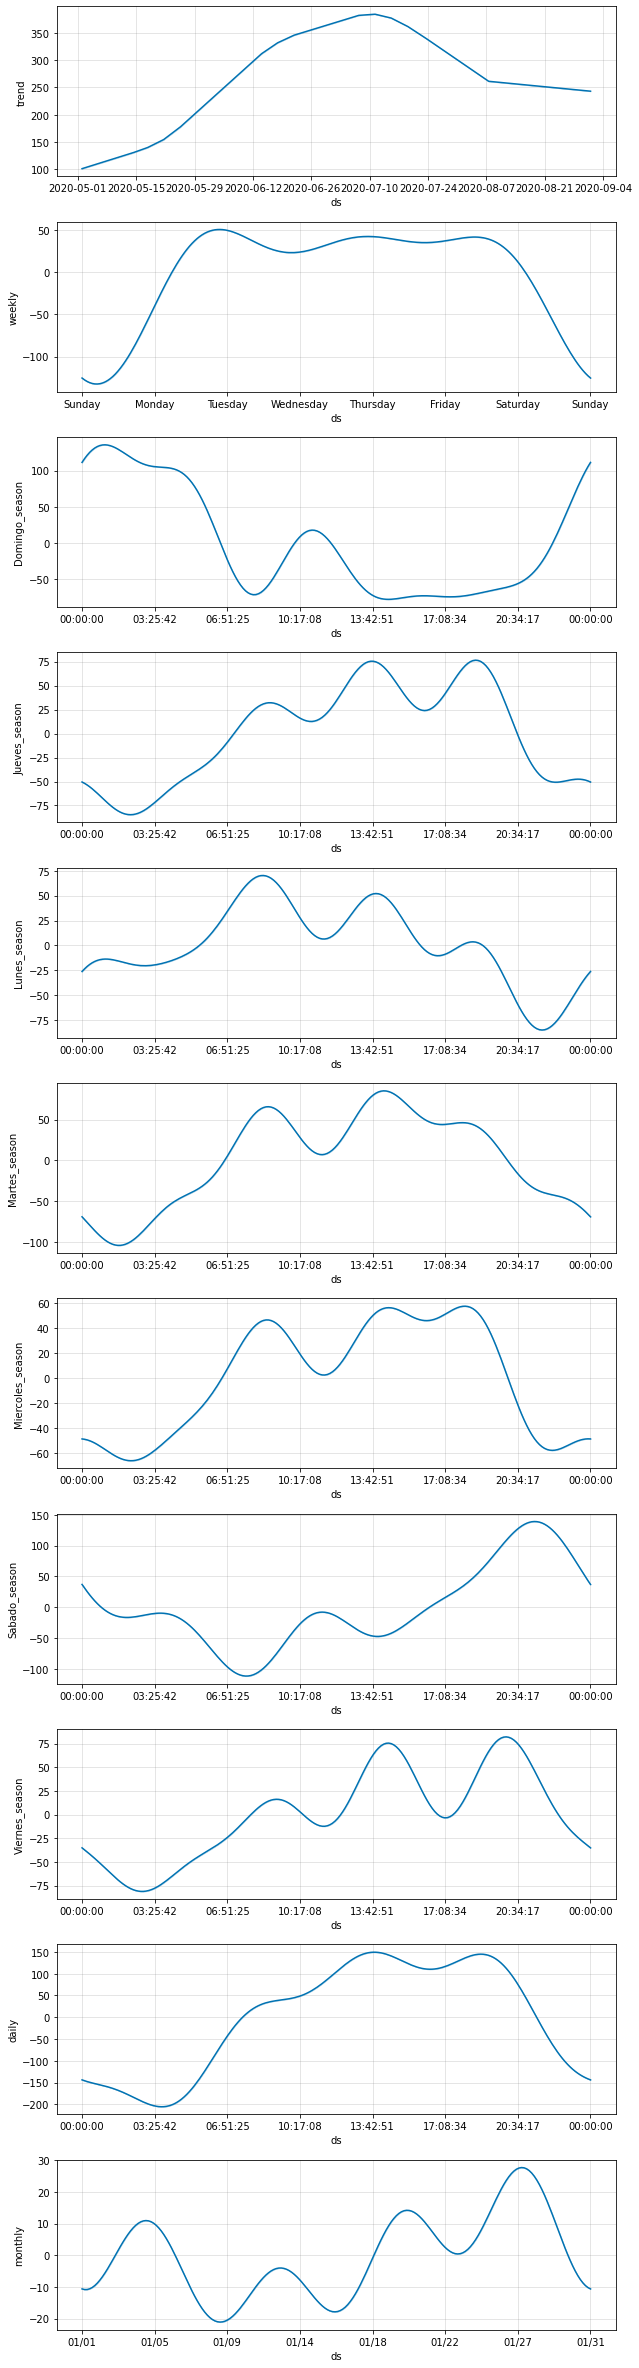

In [12]:
predictions = list()

# Se crea una función de predicción continua
def rolling_forecast():   
    predictions_rolling = pd.DataFrame({})
    history = Train.copy()   # El problema es en history    
    
    for t in range(len(test_X)):        
        m = Prophet()
        m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
        m.add_seasonality(name='Lunes_season', period=1, fourier_order=5, condition_name='Lunes')
        m.add_seasonality(name='Martes_season', period=1, fourier_order=5, condition_name='Martes')
        m.add_seasonality(name='Miercoles_season', period=1, fourier_order=5, condition_name='Miercoles')
        m.add_seasonality(name='Jueves_season', period=1, fourier_order=5, condition_name='Jueves')
        m.add_seasonality(name='Viernes_season', period=1, fourier_order=5, condition_name='Viernes')
        m.add_seasonality(name='Sabado_season', period=1, fourier_order=5, condition_name='Sabado')
        m.add_seasonality(name='Domingo_season', period=1, fourier_order=5, condition_name='Domingo')
        m.fit(history);
        
        #future es el Dataframe con todas las fEchas de entrenamiento y va agregando fechas futuras en cada ciclo        
        future = m.make_future_dataframe(periods=1, freq='H')   
        future['Lunes'] = future['ds'].apply(est_Lunes)
        future['Martes'] = future['ds'].apply(est_Martes)
        future['Miercoles'] = future['ds'].apply(est_Miercoles)
        future['Jueves'] = future['ds'].apply(est_Jueves)
        future['Viernes'] = future['ds'].apply(est_Viernes)
        future['Sabado'] = future['ds'].apply(est_Sabado)
        future['Domingo'] = future['ds'].apply(est_Domingo)
        
        #forecast contiene todos los datos de entrenamiento, además va agregando 1 a 1 las predicciones        
        forecast = m.predict(future)         
        output=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]        
        
        # La variable yhat contiene la predicción en cada ciclo 
        yhat = output[['yhat']][len(history):].values[0][0]         
        yhat2 = output[['ds','yhat']][len(history):]         
        predictions_rolling = predictions_rolling.append(yhat2)   
        
        #obs crea un nuevo datafRame en cada ciclo con la fecha a predecir y el valor real
        data = {'ds': [Test[['ds']].iloc[t]], 'y': [Test[['y']].iloc[t]]}
        obs = pd.DataFrame(Test[['ds','y','Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']].iloc[t]) #t inicia en 0 hasta la longitud de test_x      
        
        #history concatena los datos de entrenamiento y los datos de prueba (test)
        history = pd.concat([history, obs.transpose()],axis=0) #Hace que el dataframe se actualice con fEchas futuras
        print('predicted=%f, expected=%f' % (yhat, obs.transpose()['y']))
        
    fig = m.plot_components(forecast)
        
        
    return fig, predictions_rolling
        

fig, predictions_rolling = rolling_forecast()

# Calculamos RMSE
## Se obtiene una medida RMSE mejor al agregar la estacionalidad por día de la semana
### El modelo ahora cuenta con estacionalidad mensual, semanal y diaria personalizada. 
### RMSE de 57.80

# Comparamos la curva de prueba y la curva predicha

In [13]:
Test = Test[['ds','y']]
Test = Test.set_index('ds')

In [14]:
predictions_rolling
predictions_rolling = predictions_rolling.set_index('ds')

Text(0, 0.5, 'Desplazamientos')

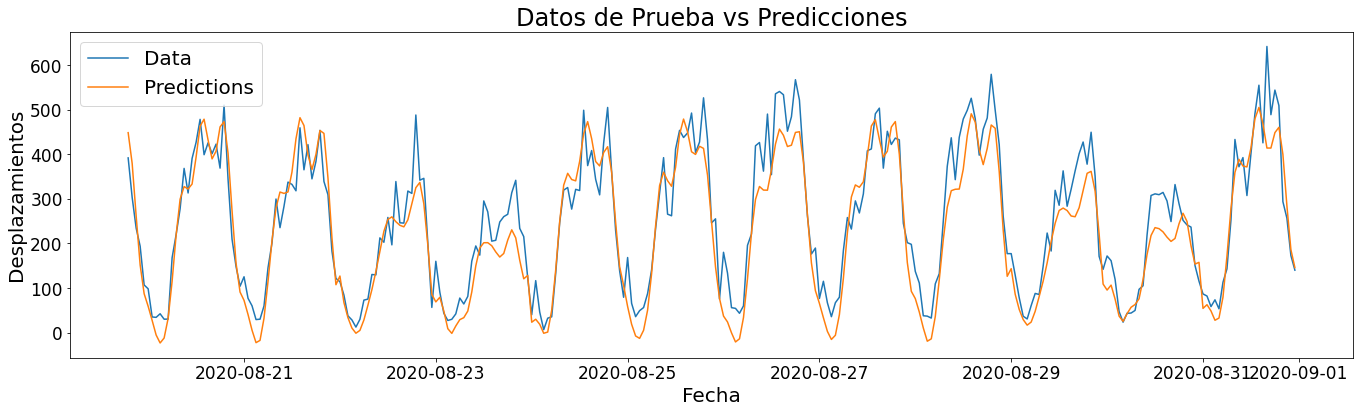

In [15]:
plt.figure(figsize=(23,6))
plt.plot(Test)
plt.plot(predictions_rolling)
plt.tick_params(axis='x', labelsize=17)
plt.tick_params(axis='y', labelsize=17)
plt.legend(('Data','Predictions'),fontsize=20)

plt.title('Datos de Prueba vs Predicciones', fontsize=24)
plt.xlabel('Fecha',fontsize=20)
plt.ylabel('Desplazamientos',fontsize=20)

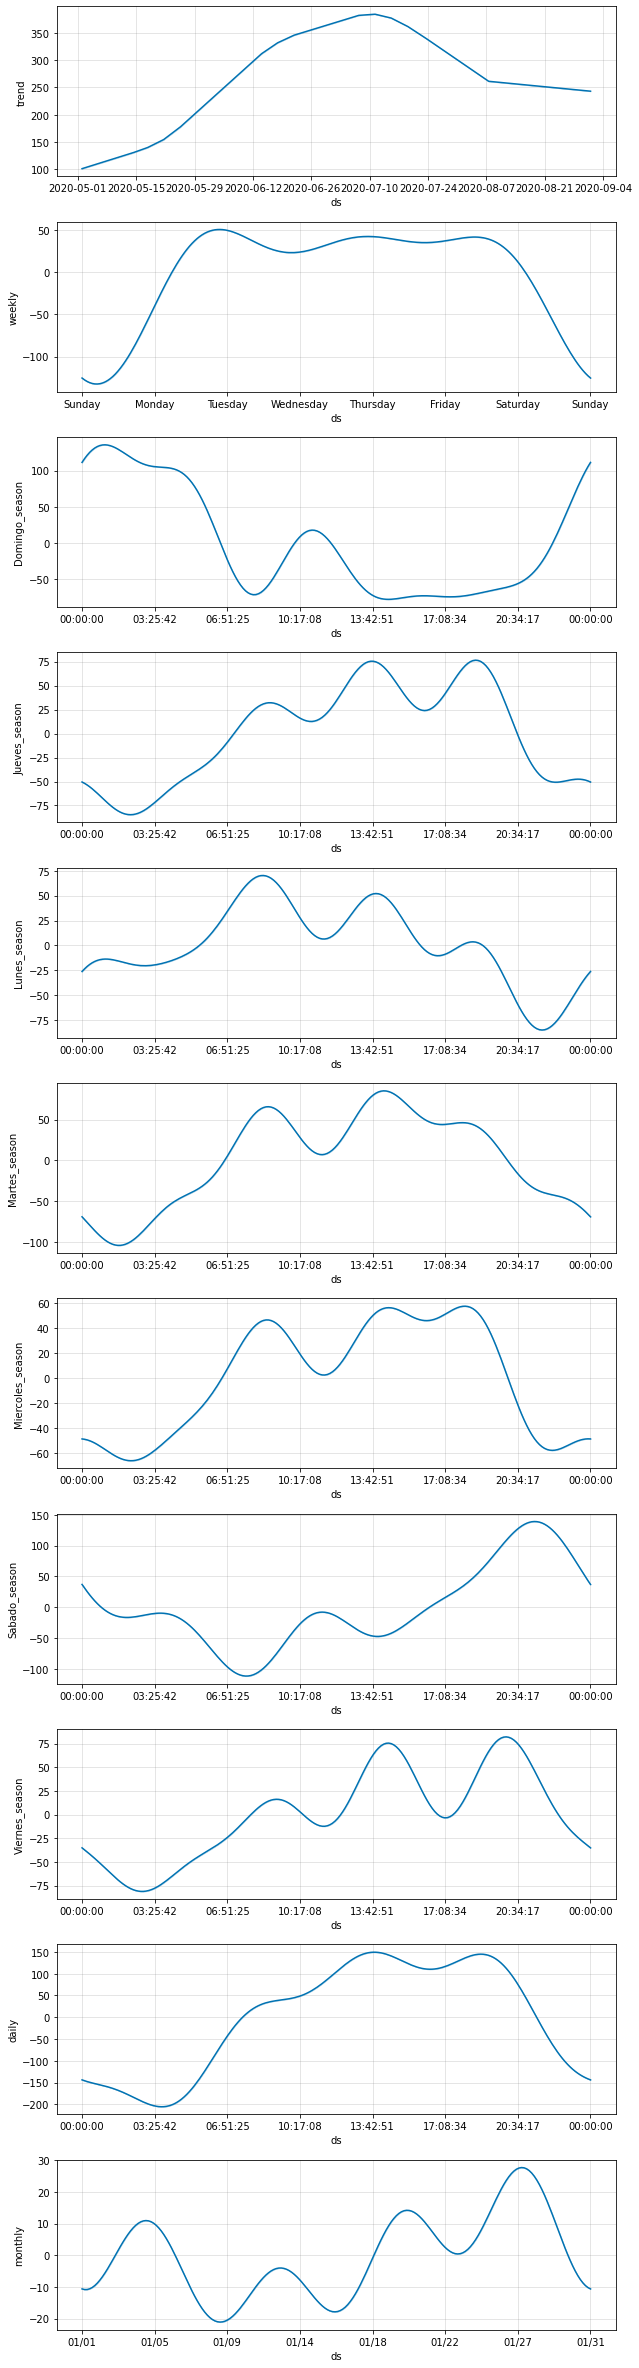

In [16]:
fig